# I. 환경 설정

In [1]:
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # warning 메시지 숨기기

import tensorflow as tf
print("Is GPU available:", tf.test.is_gpu_available())

import tensorflow as tf
print('tf.__version__:',tf.__version__)

2025-03-13 09:11:42.240765: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-13 09:11:42.290795: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-13 09:11:43.120050: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is GPU available: True
tf.__version__: 2.13.0


2025-03-13 09:11:44.152980: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-13 09:11:44.164108: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-13 09:11:44.166764: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [2]:
tf.config.set_visible_devices([], 'GPU')

2025-03-13 09:11:46.074445: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-13 09:11:46.075853: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-13 09:11:46.077166: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# II. 1차 개선 코드

1. 단일 데이터와 다중 데이터를 모두 처리 가능
2. Energy Score 기반 OOD 탐지와 Z-score 보정을 결합
3. 모델 초기화와 실시간 예측을 효율적으로 처리
4. 결과 시각화 및 평가를 선택적으로 수행

## 1. 개발용 코드 (평가 및 시각화 기반)

모델 model/resnet_model_modified_v6.h5 로드 완료.
Data shape: (990, 50)
Unique true labels: ['기타소음' '이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음']
Encoded true labels: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 

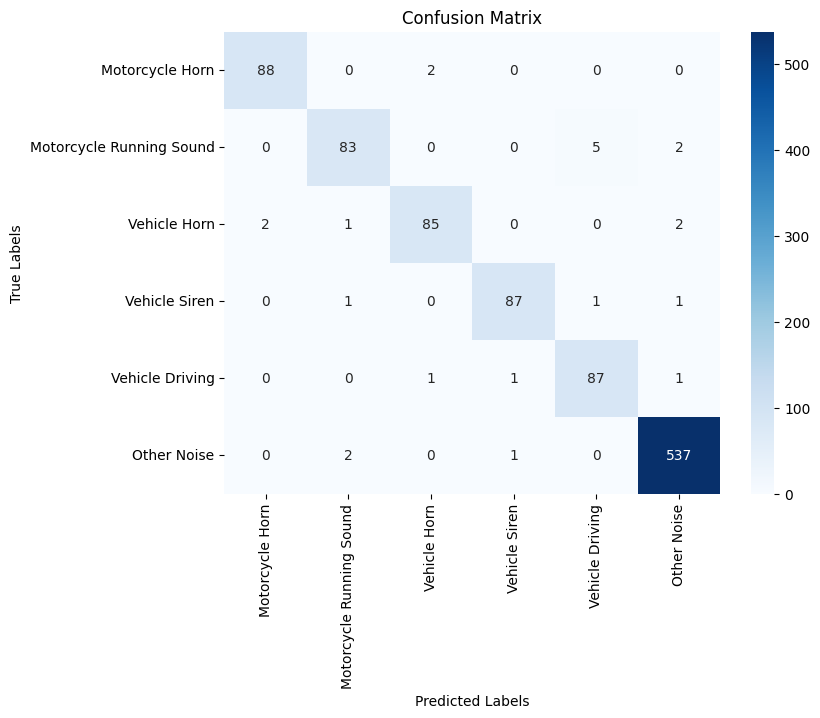

Overall Accuracy: 0.9768


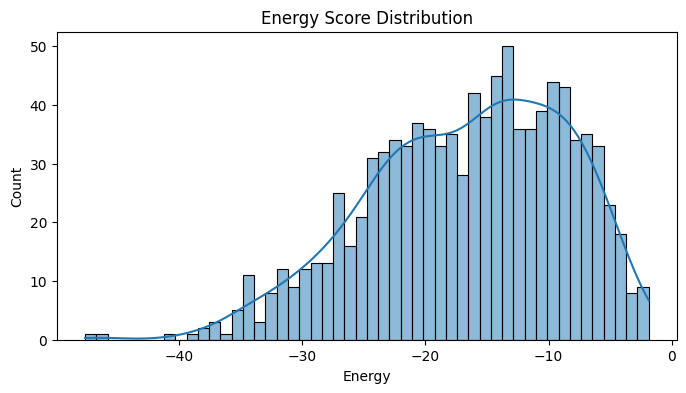


--- Sample Predictions ---
Sample 0: True = 기타소음, Predicted = 기타소음, Energy Score = -11.5521
Sample 1: True = 기타소음, Predicted = 기타소음, Energy Score = -23.0595
Sample 2: True = 기타소음, Predicted = 기타소음, Energy Score = -16.2884
Sample 3: True = 기타소음, Predicted = 기타소음, Energy Score = -31.7990
Sample 4: True = 기타소음, Predicted = 기타소음, Energy Score = -15.7097
Sample 5: True = 기타소음, Predicted = 기타소음, Energy Score = -9.9492
Sample 6: True = 기타소음, Predicted = 기타소음, Energy Score = -8.2780
Sample 7: True = 기타소음, Predicted = 기타소음, Energy Score = -22.3631
Sample 8: True = 기타소음, Predicted = 기타소음, Energy Score = -5.8696
Sample 9: True = 기타소음, Predicted = 기타소음, Energy Score = -8.5291
Predicted Label: 기타소음, Energy Score: -11.5521, Z-score: -0.52


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import tensorflow.keras.backend as K

# 전역 변수
MODEL = None
LOGITS_MODEL = None
ENERGY_THRESHOLD = -1.8595  # 출력에서 확인된 최적 값
CONFIDENCE_THRESHOLD = 0.8
MEAN_ENERGY_IND = -10.0  # IND 데이터의 Energy Score 평균 (실제 데이터로 조정 필요)
STD_ENERGY_IND = 3.0     # IND 데이터의 Energy Score 표준편차 (실제 데이터로 조정 필요)

# 라벨 정의
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn',
                  'Vehicle Siren', 'Vehicle Driving', 'Other Noise']
label_to_code = {label: i for i, label in enumerate(final_labels)}
index_to_label = {v: k for k, v in label_to_code.items()}
unknown_label_index = label_to_code['기타소음']

# 모델 초기화
def initialize_models(model_path="model/resnet_model_modified_v6.h5"):
    global MODEL, LOGITS_MODEL
    if MODEL is None:
        MODEL = load_model(model_path)
        last_layer = MODEL.layers[-1]
        if last_layer.get_config().get("activation") == "softmax":
            logits = Model(inputs=MODEL.input, outputs=MODEL.layers[-2].output)
            new_dense = Dense(last_layer.units, activation=None, name='logits')(logits.output)
            LOGITS_MODEL = Model(inputs=MODEL.input, outputs=new_dense)
            LOGITS_MODEL.layers[-1].set_weights(last_layer.get_weights())
        else:
            LOGITS_MODEL = MODEL
        print(f"모델 {model_path} 로드 완료.")

# Energy Score 계산
def compute_energy(logits, T=1.0):
    exp_vals = np.exp(logits / T)
    sum_exp = np.sum(exp_vals, axis=1) + 1e-9
    energy = -T * np.log(sum_exp)
    return energy

# 단일/다중 데이터 예측 함수
def predict_samples(mfcc_data, confidence_threshold=CONFIDENCE_THRESHOLD, energy_threshold=ENERGY_THRESHOLD):
    # 입력 데이터 reshape
    if len(mfcc_data.shape) == 1:  # 단일 데이터
        X = mfcc_data.reshape(1, 50, 1)
    elif len(mfcc_data.shape) == 2:  # 다중 데이터 (n_samples, 50)
        X = mfcc_data.reshape(-1, 50, 1)
    else:
        raise ValueError("입력 데이터는 (50,) 또는 (n_samples, 50) 형태여야 합니다.")

    # Logits 및 Energy Score 계산
    logits = LOGITS_MODEL.predict(X, verbose=0)
    energy_scores = compute_energy(logits, T=1.0)

    # Softmax 확률 계산
    exp_logits = np.exp(logits)
    softmax_probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
    max_probs = np.max(softmax_probs, axis=1)
    basic_preds = np.argmax(softmax_probs, axis=1)

    # Z-score 계산
    z_scores = (energy_scores - MEAN_ENERGY_IND) / STD_ENERGY_IND

    # 최종 예측 (Energy Score + Z-score 조합)
    final_preds = np.where((max_probs < confidence_threshold) & 
                           (energy_scores > energy_threshold) & 
                           (z_scores > 2),  # Z-score가 2 이상이면 OOD로 강화
                           unknown_label_index, basic_preds)

    return final_preds, energy_scores, z_scores

# 평가 및 시각화 함수 (다중 데이터용)
def evaluate_predictions(y_true, y_pred, energy_scores):
    print("\n--- Classification Report ---")
    report = classification_report(y_true, y_pred, target_names=english_labels)
    print(report)

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=english_labels, yticklabels=english_labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    overall_acc = accuracy_score(y_true, y_pred)
    print(f"Overall Accuracy: {overall_acc:.4f}")

    plt.figure(figsize=(8, 4))
    sns.histplot(energy_scores, bins=50, kde=True)
    plt.title("Energy Score Distribution")
    plt.xlabel("Energy")
    plt.show()

# 샘플 예측 출력
def print_sample_predictions(X, y_true, y_pred, energy_scores, num_samples=10):
    print("\n--- Sample Predictions ---")
    for i in range(min(num_samples, len(y_pred))):
        true_lbl = index_to_label[y_true[i]] if y_true is not None else "Unknown"
        pred_lbl = index_to_label[y_pred[i]]
        eng_score = energy_scores[i]
        print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Energy Score = {eng_score:.4f}")

# 메인 실행 함수
def main(mfcc_data, y_true=None, evaluate=False):
    initialize_models()
    
    # 예측 수행
    y_pred, energy_scores, z_scores = predict_samples(mfcc_data)
    
    # 단일 데이터일 경우 결과 출력
    if len(mfcc_data.shape) == 1:
        pred_label = index_to_label[y_pred[0]]
        energy_score = energy_scores[0]
        z_score = z_scores[0]
        print(f"Predicted Label: {pred_label}, Energy Score: {energy_score:.4f}, Z-score: {z_score:.2f}")
        return y_pred[0], energy_score, z_score
    
    # 다중 데이터일 경우
    print(f"Data shape: {mfcc_data.shape}")
    if y_true is not None:
        print(f"Unique true labels: {np.unique([index_to_label[l] for l in y_true])}")
        print(f"Encoded true labels: {y_true}")
        if evaluate:
            evaluate_predictions(y_true, y_pred, energy_scores)
    print_sample_predictions(mfcc_data, y_true, y_pred, energy_scores)
    return y_pred, energy_scores, z_scores

if __name__ == "__main__":
    # 테스트 데이터 로드 (다중 데이터 예제)
    test_file = "final_csv/final_test_sampled_90_category_03.csv"
    df_test = pd.read_csv(test_file)
    mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
    X_test = df_test[mfcc_columns].values
    y_true_ood = df_test['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index)).values

    # 다중 데이터 실행
    y_pred, energy_scores, z_scores = main(X_test, y_true_ood, evaluate=True)

    # 단일 데이터 실행 예제
    sample_mfcc = X_test[0]  # 첫 번째 샘플 사용
    pred_label, energy_score, z_score = main(sample_mfcc)

모델 model/resnet_model_modified_v6.h5 로드 완료.
Data shape: (1374, 50)
Unique true labels: ['기타소음']
Encoded true labels: [5 5 5 ... 5 5 5]

--- Classification Report ---
                          precision    recall  f1-score   support

         Motorcycle Horn       0.00      0.00      0.00         0
Motorcycle Running Sound       0.00      0.00      0.00         0
            Vehicle Horn       0.00      0.00      0.00         0
           Vehicle Siren       0.00      0.00      0.00         0
         Vehicle Driving       0.00      0.00      0.00         0
             Other Noise       1.00      0.54      0.70      1374

                accuracy                           0.54      1374
               macro avg       0.17      0.09      0.12      1374
            weighted avg       1.00      0.54      0.70      1374



/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


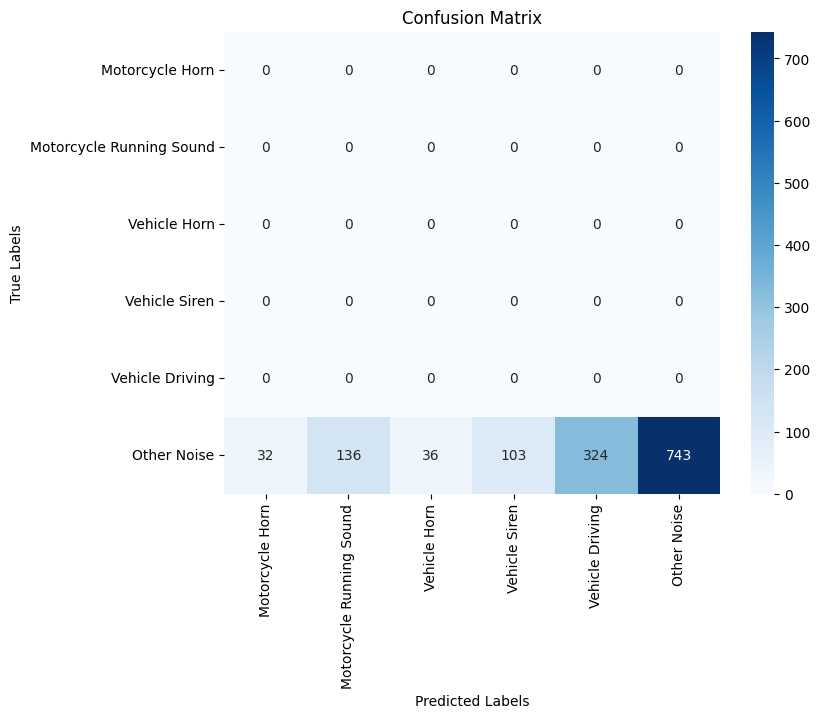

Overall Accuracy: 0.5408


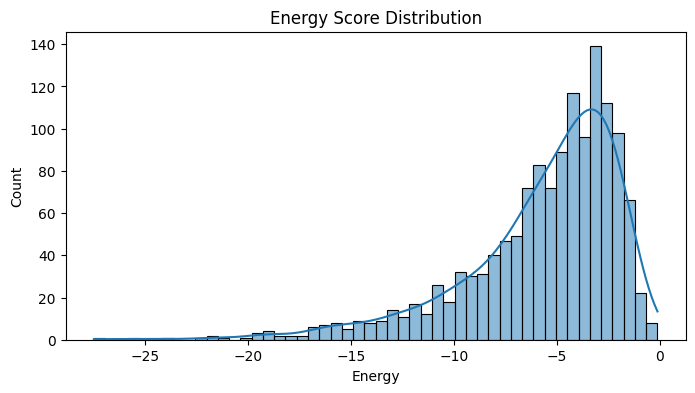


--- Sample Predictions ---
Sample 0: True = 기타소음, Predicted = 기타소음, Energy Score = -5.4858
Sample 1: True = 기타소음, Predicted = 차량사이렌, Energy Score = -4.0147
Sample 2: True = 기타소음, Predicted = 기타소음, Energy Score = -5.9335
Sample 3: True = 기타소음, Predicted = 기타소음, Energy Score = -7.7172
Sample 4: True = 기타소음, Predicted = 이륜차경적, Energy Score = -2.0617
Sample 5: True = 기타소음, Predicted = 차량경적, Energy Score = -3.0168
Sample 6: True = 기타소음, Predicted = 이륜차경적, Energy Score = -5.9419
Sample 7: True = 기타소음, Predicted = 기타소음, Energy Score = -2.7637
Sample 8: True = 기타소음, Predicted = 기타소음, Energy Score = -9.5543
Sample 9: True = 기타소음, Predicted = 기타소음, Energy Score = -10.6599
Predicted Label: 기타소음, Energy Score: -5.4858, Z-score: 1.50


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import tensorflow.keras.backend as K

# 전역 변수
MODEL = None
LOGITS_MODEL = None
ENERGY_THRESHOLD = -1.8595  # 출력에서 확인된 최적 값
CONFIDENCE_THRESHOLD = 0.8
MEAN_ENERGY_IND = -10.0  # IND 데이터의 Energy Score 평균 (실제 데이터로 조정 필요)
STD_ENERGY_IND = 3.0     # IND 데이터의 Energy Score 표준편차 (실제 데이터로 조정 필요)

# 라벨 정의
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn',
                  'Vehicle Siren', 'Vehicle Driving', 'Other Noise']
label_to_code = {label: i for i, label in enumerate(final_labels)}
index_to_label = {v: k for k, v in label_to_code.items()}
unknown_label_index = label_to_code['기타소음']

# 모델 초기화
def initialize_models(model_path="model/resnet_model_modified_v6.h5"):
    global MODEL, LOGITS_MODEL
    if MODEL is None:
        MODEL = load_model(model_path)
        last_layer = MODEL.layers[-1]
        if last_layer.get_config().get("activation") == "softmax":
            logits = Model(inputs=MODEL.input, outputs=MODEL.layers[-2].output)
            new_dense = Dense(last_layer.units, activation=None, name='logits')(logits.output)
            LOGITS_MODEL = Model(inputs=MODEL.input, outputs=new_dense)
            LOGITS_MODEL.layers[-1].set_weights(last_layer.get_weights())
        else:
            LOGITS_MODEL = MODEL
        print(f"모델 {model_path} 로드 완료.")

# Energy Score 계산
def compute_energy(logits, T=1.0):
    exp_vals = np.exp(logits / T)
    sum_exp = np.sum(exp_vals, axis=1) + 1e-9
    energy = -T * np.log(sum_exp)
    return energy

# 단일/다중 데이터 예측 함수
def predict_samples(mfcc_data, confidence_threshold=CONFIDENCE_THRESHOLD, energy_threshold=ENERGY_THRESHOLD):
    # 입력 데이터 reshape
    if len(mfcc_data.shape) == 1:  # 단일 데이터
        X = mfcc_data.reshape(1, 50, 1)
    elif len(mfcc_data.shape) == 2:  # 다중 데이터 (n_samples, 50)
        X = mfcc_data.reshape(-1, 50, 1)
    else:
        raise ValueError("입력 데이터는 (50,) 또는 (n_samples, 50) 형태여야 합니다.")

    # Logits 및 Energy Score 계산
    logits = LOGITS_MODEL.predict(X, verbose=0)
    energy_scores = compute_energy(logits, T=1.0)

    # Softmax 확률 계산
    exp_logits = np.exp(logits)
    softmax_probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
    max_probs = np.max(softmax_probs, axis=1)
    basic_preds = np.argmax(softmax_probs, axis=1)

    # Z-score 계산
    z_scores = (energy_scores - MEAN_ENERGY_IND) / STD_ENERGY_IND

    # 최종 예측 (Energy Score + Z-score 조합)
    final_preds = np.where((max_probs < confidence_threshold) & 
                           (energy_scores > energy_threshold) & 
                           (z_scores > 2),  # Z-score가 2 이상이면 OOD로 강화
                           unknown_label_index, basic_preds)

    return final_preds, energy_scores, z_scores

# 평가 및 시각화 함수 (다중 데이터용)
def evaluate_predictions(y_true, y_pred, energy_scores):
    print("\n--- Classification Report ---")
    report = classification_report(y_true, y_pred, target_names=english_labels)
    print(report)

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=english_labels, yticklabels=english_labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    overall_acc = accuracy_score(y_true, y_pred)
    print(f"Overall Accuracy: {overall_acc:.4f}")

    plt.figure(figsize=(8, 4))
    sns.histplot(energy_scores, bins=50, kde=True)
    plt.title("Energy Score Distribution")
    plt.xlabel("Energy")
    plt.show()

# 샘플 예측 출력
def print_sample_predictions(X, y_true, y_pred, energy_scores, num_samples=10):
    print("\n--- Sample Predictions ---")
    for i in range(min(num_samples, len(y_pred))):
        true_lbl = index_to_label[y_true[i]] if y_true is not None else "Unknown"
        pred_lbl = index_to_label[y_pred[i]]
        eng_score = energy_scores[i]
        print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Energy Score = {eng_score:.4f}")

# 메인 실행 함수
def main(mfcc_data, y_true=None, evaluate=False):
    initialize_models()
    
    # 예측 수행
    y_pred, energy_scores, z_scores = predict_samples(mfcc_data)
    
    # 단일 데이터일 경우 결과 출력
    if len(mfcc_data.shape) == 1:
        pred_label = index_to_label[y_pred[0]]
        energy_score = energy_scores[0]
        z_score = z_scores[0]
        print(f"Predicted Label: {pred_label}, Energy Score: {energy_score:.4f}, Z-score: {z_score:.2f}")
        return y_pred[0], energy_score, z_score
    
    # 다중 데이터일 경우
    print(f"Data shape: {mfcc_data.shape}")
    if y_true is not None:
        print(f"Unique true labels: {np.unique([index_to_label[l] for l in y_true])}")
        print(f"Encoded true labels: {y_true}")
        if evaluate:
            evaluate_predictions(y_true, y_pred, energy_scores)
    print_sample_predictions(mfcc_data, y_true, y_pred, energy_scores)
    return y_pred, energy_scores, z_scores

if __name__ == "__main__":
    # 테스트 데이터 로드 (다중 데이터 예제)
    test_file = "final_csv/untrained other noises.csv"
    df_test = pd.read_csv(test_file)
    mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
    X_test = df_test[mfcc_columns].values
    y_true_ood = df_test['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index)).values

    # 다중 데이터 실행
    y_pred, energy_scores, z_scores = main(X_test, y_true_ood, evaluate=True)

    # 단일 데이터 실행 예제
    sample_mfcc = X_test[0]  # 첫 번째 샘플 사용
    pred_label, energy_score, z_score = main(sample_mfcc)

## 2. 웹 서비스용 코드(예측 결과 반환)

In [12]:
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense

# 전역 변수
MODEL = None
LOGITS_MODEL = None
ENERGY_THRESHOLD = -1.8595  # 이전 출력에서 확인된 최적 값
CONFIDENCE_THRESHOLD = 0.8
MEAN_ENERGY_IND = -10.0  # IND 데이터의 Energy Score 평균 (실제 데이터로 조정 필요)
STD_ENERGY_IND = 3.0     # IND 데이터의 Energy Score 표준편차 (실제 데이터로 조정 필요)

# 라벨 정의
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn',
                  'Vehicle Siren', 'Vehicle Driving', 'Other Noise']
label_to_code = {label: i for i, label in enumerate(final_labels)}
index_to_label = {v: k for k, v in label_to_code.items()}
unknown_label_index = label_to_code['기타소음']

# 모델 초기화
def initialize_models(model_path="model/resnet_model_modified_v6.h5"):
    global MODEL, LOGITS_MODEL
    if MODEL is None:
        MODEL = load_model(model_path)
        last_layer = MODEL.layers[-1]
        if last_layer.get_config().get("activation") == "softmax":
            logits = Model(inputs=MODEL.input, outputs=MODEL.layers[-2].output)
            new_dense = Dense(last_layer.units, activation=None, name='logits')(logits.output)
            LOGITS_MODEL = Model(inputs=MODEL.input, outputs=new_dense)
            LOGITS_MODEL.layers[-1].set_weights(last_layer.get_weights())
        else:
            LOGITS_MODEL = MODEL
        print(f"모델 {model_path} 로드 완료.")

# Energy Score 계산
def compute_energy(logits, T=1.0):
    exp_vals = np.exp(logits / T)
    sum_exp = np.sum(exp_vals, axis=1) + 1e-9
    energy = -T * np.log(sum_exp)
    return energy

# 예측 함수 (단일/다중 데이터 처리)
def predict_samples(mfcc_data, confidence_threshold=CONFIDENCE_THRESHOLD, energy_threshold=ENERGY_THRESHOLD):
    # 입력 데이터 reshape
    if len(mfcc_data.shape) == 1:  # 단일 데이터
        X = mfcc_data.reshape(1, 50, 1)
    elif len(mfcc_data.shape) == 2:  # 다중 데이터 (n_samples, 50)
        X = mfcc_data.reshape(-1, 50, 1)
    else:
        raise ValueError("입력 데이터는 (50,) 또는 (n_samples, 50) 형태여야 합니다.")

    # 모델 초기화 확인
    if LOGITS_MODEL is None:
        initialize_models()

    # Logits 및 Energy Score 계산
    logits = LOGITS_MODEL.predict(X, verbose=0)
    energy_scores = compute_energy(logits, T=1.0)

    # Softmax 확률 계산
    exp_logits = np.exp(logits)
    softmax_probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
    max_probs = np.max(softmax_probs, axis=1)
    basic_preds = np.argmax(softmax_probs, axis=1)

    # Z-score 계산
    z_scores = (energy_scores - MEAN_ENERGY_IND) / STD_ENERGY_IND

    # 최종 예측 (Energy Score + Z-score 조합)
    final_preds = np.where((max_probs < confidence_threshold) & 
                           (energy_scores > energy_threshold) & 
                           (z_scores > 2),  # Z-score가 2 이상이면 OOD로 강화
                           unknown_label_index, basic_preds)

    # 결과 출력
    if len(mfcc_data.shape) == 1:  # 단일 데이터
        print(f"Predicted Label: {index_to_label[final_preds[0]]}, Energy Score: {energy_scores[0]:.4f}, Z-score: {z_scores[0]:.2f}")
    else:  # 다중 데이터
        for i in range(len(final_preds)):
            print(f"Sample {i}: Predicted Label: {index_to_label[final_preds[i]]}, Energy Score: {energy_scores[i]:.4f}, Z-score: {z_scores[i]:.2f}")

    return final_preds, energy_scores, z_scores

# 사용 예제
if __name__ == "__main__":
    # 단일 데이터 예제
    sample_mfcc = np.random.rand(50)  # 임의의 MFCC 데이터
    print("단일 데이터 예측:")
    pred_label, energy_score, z_score = predict_samples(sample_mfcc)

    # 다중 데이터 예제
    multi_mfcc = np.random.rand(3, 50)  # 3개의 임의 MFCC 데이터
    print("\n다중 데이터 예측:")
    pred_labels, energy_scores, z_scores = predict_samples(multi_mfcc)

단일 데이터 예측:
모델 model/resnet_model_modified_v6.h5 로드 완료.
Predicted Label: 기타소음, Energy Score: -2.8299, Z-score: 2.39

다중 데이터 예측:
Sample 0: Predicted Label: 기타소음, Energy Score: -2.7858, Z-score: 2.40
Sample 1: Predicted Label: 기타소음, Energy Score: -3.0171, Z-score: 2.33
Sample 2: Predicted Label: 기타소음, Energy Score: -2.8489, Z-score: 2.38


# III. 2차 개선 코드

## 1. 개발용 코드 (평가 및 시각화 기반)

> 개선 사항
1. 동적 설정:
- 기존: 고정된 임계값과 통계값 → 데이터 의존적이지 않음.
- 개선: ROC 기반 ENERGY_THRESHOLD, 실시간 통계 업데이트 → 데이터에 적응 가능.

2. 안정성 강화:
- 기존: 최소한의 예외 처리와 검증 → 오류 발생 시 추적 어려움.
- 개선: 포괄적인 예외 처리, 데이터 검증, 로깅 → 안정적이고 디버깅 용이.

3. 유연성 향상:
- 기존: 고정 경로와 설정 → 변경 시 코드 수정 필요.
- 개선: 모델 경로 매개변수화, 동적 설정 → 사용자 맞춤 가능.

4.정보 제공:
- 기존: 기본 출력만 제공 → Z-score 등 활용 부족.
- 개선: Z-score 포함, 로그로 상세 기록 → 분석에 유리.

2025-03-12 10:17:28,055 - INFO - 모델 model/resnet_model_modified_v6.h5 로드 완료.
2025-03-12 10:17:28,056 - WARNING - 검증 데이터 없음. 기본 ENERGY_THRESHOLD 사용: -1.8595
2025-03-12 10:17:28,881 - INFO - Updated MEAN_ENERGY_IND: -15.3239, STD_ENERGY_IND: 8.5104
2025-03-12 10:17:28,882 - INFO - Data shape: (990, 50)
2025-03-12 10:17:28,884 - INFO - Unique true labels: ['기타소음' '이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음']
2025-03-12 10:17:28,884 - INFO - 
--- Classification Report ---
2025-03-12 10:17:28,896 - INFO -                           precision    recall  f1-score   support

         Motorcycle Horn       0.98      0.98      0.98        90
Motorcycle Running Sound       0.94      0.92      0.93        90
            Vehicle Horn       0.97      0.94      0.96        90
           Vehicle Siren       0.98      0.97      0.97        90
         Vehicle Driving       0.94      0.97      0.95        90
             Other Noise       0.99      0.99      0.99       540

                accuracy           

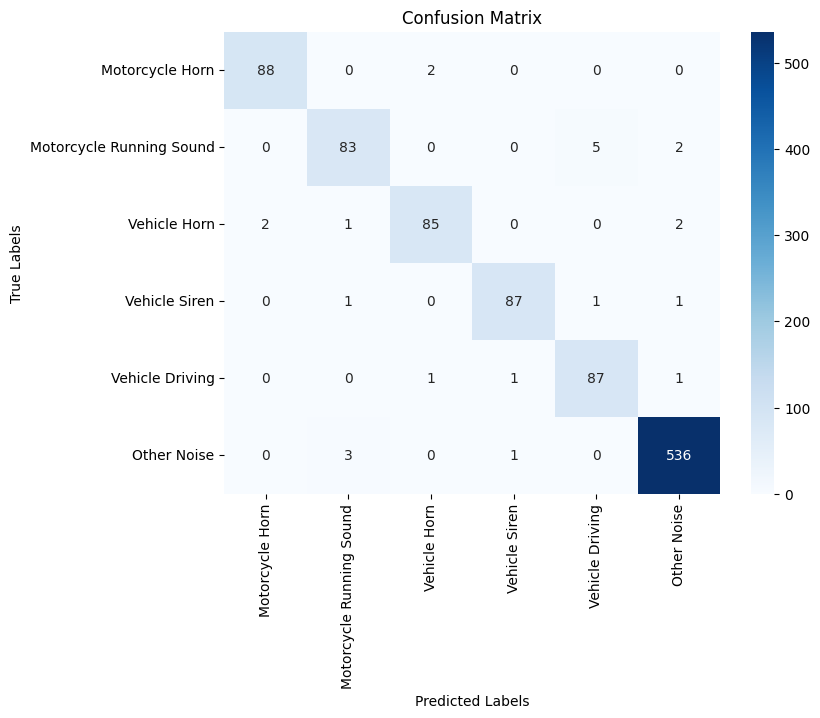

2025-03-12 10:17:29,263 - INFO - Overall Accuracy: 0.9758


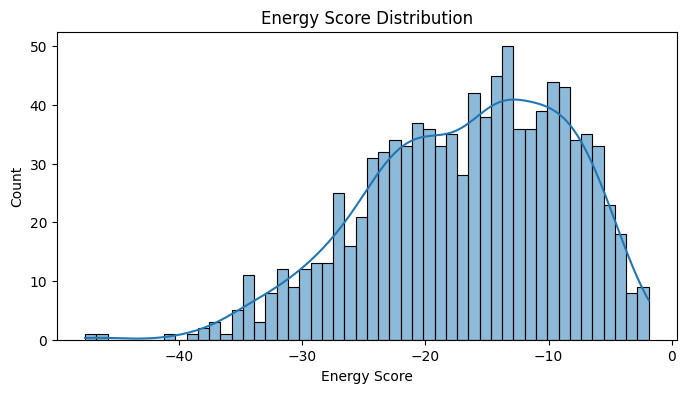

2025-03-12 10:17:29,556 - INFO - 
--- Sample Predictions ---
2025-03-12 10:17:29,556 - INFO - Sample 0: True = 기타소음, Predicted = 기타소음, Energy Score = -11.5521
2025-03-12 10:17:29,557 - INFO - Sample 1: True = 기타소음, Predicted = 기타소음, Energy Score = -23.0595
2025-03-12 10:17:29,558 - INFO - Sample 2: True = 기타소음, Predicted = 기타소음, Energy Score = -16.2884
2025-03-12 10:17:29,558 - INFO - Sample 3: True = 기타소음, Predicted = 기타소음, Energy Score = -31.7990
2025-03-12 10:17:29,559 - INFO - Sample 4: True = 기타소음, Predicted = 기타소음, Energy Score = -15.7097
2025-03-12 10:17:29,559 - INFO - Sample 5: True = 기타소음, Predicted = 기타소음, Energy Score = -9.9492
2025-03-12 10:17:29,560 - INFO - Sample 6: True = 기타소음, Predicted = 기타소음, Energy Score = -8.2780
2025-03-12 10:17:29,560 - INFO - Sample 7: True = 기타소음, Predicted = 기타소음, Energy Score = -22.3631
2025-03-12 10:17:29,561 - INFO - Sample 8: True = 기타소음, Predicted = 기타소음, Energy Score = -5.8696
2025-03-12 10:17:29,562 - INFO - Sample 9: True = 기타소음, Pred

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
import logging

# 로깅 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 전역 변수
MODEL = None
LOGITS_MODEL = None
ENERGY_THRESHOLD = None
CONFIDENCE_THRESHOLD = 0.8
TEMPERATURE = 1.0
MEAN_ENERGY_IND = -15.3398  # 초기값
STD_ENERGY_IND = 8.2265     # 초기값

# 라벨 정의
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn',
                  'Vehicle Siren', 'Vehicle Driving', 'Other Noise']
label_to_code = {label: i for i, label in enumerate(final_labels)}
index_to_label = {v: k for k, v in label_to_code.items()}
unknown_label_index = label_to_code['기타소음']

# 모델 초기화 (모델 경로 매개변수화)
def initialize_models(model_path="model/resnet_model_modified_v6.h5"):
    global MODEL, LOGITS_MODEL
    try:
        if MODEL is None:
            MODEL = load_model(model_path)
            last_layer = MODEL.layers[-1]
            if last_layer.get_config().get("activation") == "softmax":
                logits = Model(inputs=MODEL.input, outputs=MODEL.layers[-2].output)
                new_dense = Dense(last_layer.units, activation=None, name='logits')(logits.output)
                LOGITS_MODEL = Model(inputs=MODEL.input, outputs=new_dense)
                LOGITS_MODEL.layers[-1].set_weights(last_layer.get_weights())
            else:
                LOGITS_MODEL = MODEL
            logging.info(f"모델 {model_path} 로드 완료.")
    except Exception as e:
        logging.error(f"모델 로드 실패: {str(e)}")
        raise

# Energy Score 계산
def compute_energy(logits, T=TEMPERATURE):
    exp_vals = np.exp(logits / T)
    sum_exp = np.sum(exp_vals, axis=1) + 1e-9
    return -T * np.log(sum_exp)

# 데이터 검증 및 전처리
def validate_mfcc_data(mfcc_data):
    try:
        if not isinstance(mfcc_data, np.ndarray):
            mfcc_data = np.asarray(mfcc_data)
        if mfcc_data.ndim == 1:
            mfcc_data = mfcc_data.reshape(1, -1)
        if mfcc_data.shape[1] != 50:
            raise ValueError(f"MFCC 데이터 크기는 (n_samples, 50)이어야 함. 현재: {mfcc_data.shape}")
        if np.any(np.isnan(mfcc_data)) or np.any(np.isinf(mfcc_data)):
            raise ValueError("MFCC 데이터에 NaN 또는 Inf 값이 포함됨")
        return mfcc_data
    except Exception as e:
        logging.error(f"MFCC 데이터 검증 실패: {str(e)}")
        raise

# 통계값 업데이트 (안전장치 포함)
def update_energy_stats(energy_scores, preds, window_size=1000, max_std_dev=20.0):
    global MEAN_ENERGY_IND, STD_ENERGY_IND
    if not hasattr(update_energy_stats, 'buffer'):
        update_energy_stats.buffer = []

    ind_scores = energy_scores[preds != unknown_label_index]
    if len(ind_scores) == 0:
        return

    if STD_ENERGY_IND is not None:
        z_scores = np.abs((ind_scores - MEAN_ENERGY_IND) / STD_ENERGY_IND)
        ind_scores = ind_scores[z_scores < 3]

    update_energy_stats.buffer.extend(ind_scores)
    if len(update_energy_stats.buffer) > window_size:
        update_energy_stats.buffer = update_energy_stats.buffer[-window_size:]

    new_mean = np.mean(update_energy_stats.buffer)
    new_std = np.std(update_energy_stats.buffer)

    if new_std > max_std_dev or np.isnan(new_std):
        logging.warning("통계값 업데이트 실패: 과도한 표준편차 또는 계산 오류")
        return

    MEAN_ENERGY_IND = new_mean
    STD_ENERGY_IND = new_std
    logging.info(f"Updated MEAN_ENERGY_IND: {MEAN_ENERGY_IND:.4f}, STD_ENERGY_IND: {STD_ENERGY_IND:.4f}")

# 예측 함수
def predict_samples(mfcc_data, model_path="model/resnet_model_modified_v6.h5", normal_logits=None, normal_labels=None):
    try:
        if LOGITS_MODEL is None:
            initialize_models(model_path)

        mfcc_data = validate_mfcc_data(mfcc_data)
        if len(mfcc_data.shape) == 1:
            X = mfcc_data.reshape(1, 50, 1)
        else:
            X = mfcc_data.reshape(-1, 50, 1)

        global ENERGY_THRESHOLD
        if ENERGY_THRESHOLD is None:
            if normal_logits is not None and normal_labels is not None:
                energy_scores = compute_energy(normal_logits)
                is_ood = (normal_labels == unknown_label_index).astype(int)
                fpr, tpr, thresholds = roc_curve(is_ood, energy_scores)
                ENERGY_THRESHOLD = thresholds[np.argmax(tpr - fpr)]
                logging.info(f"ROC 기반 ENERGY_THRESHOLD: {ENERGY_THRESHOLD:.4f}")
            else:
                ENERGY_THRESHOLD = -1.8595
                logging.warning("검증 데이터 없음. 기본 ENERGY_THRESHOLD 사용: -1.8595")

        logits = LOGITS_MODEL.predict(X, verbose=0)
        energy_scores = compute_energy(logits)
        softmax_probs = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)
        max_probs = np.max(softmax_probs, axis=1)
        basic_preds = np.argmax(softmax_probs, axis=1)
        z_scores = (energy_scores - MEAN_ENERGY_IND) / STD_ENERGY_IND

        final_preds = np.where((max_probs < CONFIDENCE_THRESHOLD) & 
                               (energy_scores > ENERGY_THRESHOLD) & 
                               (z_scores > 2), unknown_label_index, basic_preds)

        update_energy_stats(energy_scores, final_preds)

        return final_preds, energy_scores, z_scores
    except Exception as e:
        logging.error(f"예측 중 오류 발생: {str(e)}")
        raise

# 평가 및 시각화 함수
def evaluate_predictions(y_true, y_pred, energy_scores):
    logging.info("\n--- Classification Report ---")
    report = classification_report(y_true, y_pred, target_names=english_labels)
    logging.info(report)

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=english_labels, yticklabels=english_labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    accuracy = accuracy_score(y_true, y_pred)
    logging.info(f"Overall Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(8, 4))
    sns.histplot(energy_scores, bins=50, kde=True)
    plt.title("Energy Score Distribution")
    plt.xlabel("Energy Score")
    plt.show()

# 샘플 예측 출력
def print_sample_predictions(y_true, y_pred, energy_scores, num_samples=10):
    logging.info("\n--- Sample Predictions ---")
    for i in range(min(num_samples, len(y_pred))):
        true_lbl = index_to_label[y_true[i]] if y_true is not None else "Unknown"
        pred_lbl = index_to_label[y_pred[i]]
        eng_score = energy_scores[i]
        logging.info(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Energy Score = {eng_score:.4f}")

# 메인 실행 함수
def main(mfcc_data, y_true=None, model_path="model/resnet_model_modified_v6.h5", evaluate=False):
    try:
        # 정상 데이터로 초기 임계값 설정 (옵션)
        normal_logits = None
        if y_true is not None:
            mfcc_data_valid = validate_mfcc_data(mfcc_data)
            normal_logits = LOGITS_MODEL.predict(mfcc_data_valid.reshape(-1, 50, 1), verbose=0) if LOGITS_MODEL else None

        y_pred, energy_scores, z_scores = predict_samples(mfcc_data, model_path, normal_logits, y_true)
        
        if len(mfcc_data.shape) == 1:
            logging.info(f"Predicted Label: {index_to_label[y_pred[0]]}, Energy Score: {energy_scores[0]:.4f}, Z-score: {z_scores[0]:.2f}")
            return y_pred[0], energy_scores[0], z_scores[0]
        
        logging.info(f"Data shape: {mfcc_data.shape}")
        if y_true is not None:
            logging.info(f"Unique true labels: {np.unique([index_to_label[l] for l in y_true])}")
            if evaluate:
                evaluate_predictions(y_true, y_pred, energy_scores)
            print_sample_predictions(y_true, y_pred, energy_scores)
        return y_pred, energy_scores, z_scores
    except Exception as e:
        logging.error(f"Main 실행 중 오류 발생: {str(e)}")
        raise

if __name__ == "__main__":
    try:
        # 테스트 데이터 로드
        test_file = "final_csv/final_test_sampled_90_category_03.csv"
        df_test = pd.read_csv(test_file)
        mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
        X_test = df_test[mfcc_columns].values
        y_true_ood = df_test['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index)).values

        # 사용자 정의 모델 경로
        custom_model_path = "model/resnet_model_modified_v6.h5"

        # 다중 데이터 테스트
        main(X_test, y_true_ood, model_path=custom_model_path, evaluate=True)

        # 단일 데이터 테스트
        main(X_test[0], model_path=custom_model_path)
    except FileNotFoundError:
        logging.warning("테스트 데이터가 없으므로 임의 데이터로 실행")
        X_test = np.random.rand(3, 50)
        main(X_test, model_path=custom_model_path)

2025-03-12 17:08:19,543 - INFO - 모델 model/resnet_model_modified_v6.h5 로드 완료.
2025-03-12 17:08:19,545 - WARNING - 검증 데이터 없음. 기본 ENERGY_THRESHOLD 사용: -1.8595
2025-03-12 17:08:20,196 - INFO - Updated MEAN_ENERGY_IND: -4.8151, STD_ENERGY_IND: 3.0626
2025-03-12 17:08:20,196 - INFO - Data shape: (1374, 50)
2025-03-12 17:08:20,198 - INFO - Unique true labels: ['기타소음']
2025-03-12 17:08:20,199 - INFO - 
--- Classification Report ---
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter

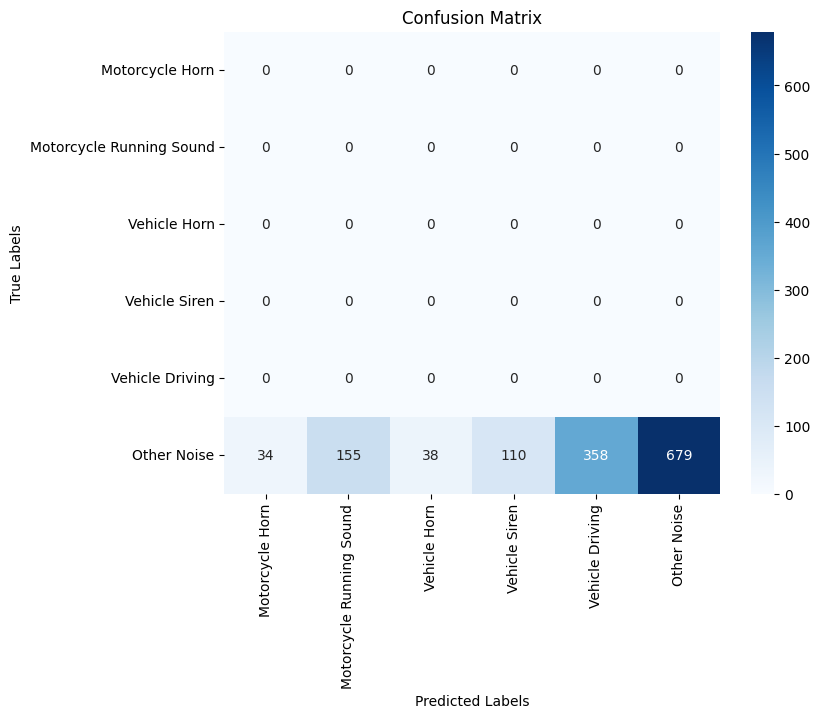

2025-03-12 17:08:20,544 - INFO - Overall Accuracy: 0.4942


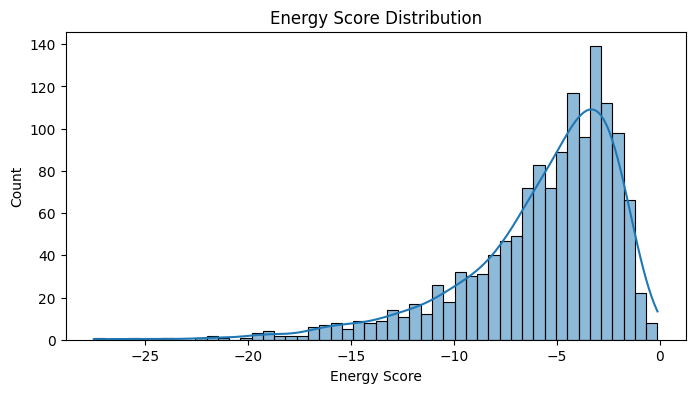

2025-03-12 17:08:20,889 - INFO - 
--- Sample Predictions ---
2025-03-12 17:08:20,890 - INFO - Sample 0: True = 기타소음, Predicted = 기타소음, Energy Score = -5.4858
2025-03-12 17:08:20,891 - INFO - Sample 1: True = 기타소음, Predicted = 차량사이렌, Energy Score = -4.0147
2025-03-12 17:08:20,891 - INFO - Sample 2: True = 기타소음, Predicted = 기타소음, Energy Score = -5.9335
2025-03-12 17:08:20,892 - INFO - Sample 3: True = 기타소음, Predicted = 기타소음, Energy Score = -7.7172
2025-03-12 17:08:20,893 - INFO - Sample 4: True = 기타소음, Predicted = 이륜차경적, Energy Score = -2.0617
2025-03-12 17:08:20,893 - INFO - Sample 5: True = 기타소음, Predicted = 차량경적, Energy Score = -3.0168
2025-03-12 17:08:20,894 - INFO - Sample 6: True = 기타소음, Predicted = 이륜차경적, Energy Score = -5.9419
2025-03-12 17:08:20,894 - INFO - Sample 7: True = 기타소음, Predicted = 기타소음, Energy Score = -2.7637
2025-03-12 17:08:20,895 - INFO - Sample 8: True = 기타소음, Predicted = 기타소음, Energy Score = -9.5543
2025-03-12 17:08:20,895 - INFO - Sample 9: True = 기타소음, Predict

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
import logging

# 로깅 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 전역 변수
MODEL = None
LOGITS_MODEL = None
ENERGY_THRESHOLD = None
CONFIDENCE_THRESHOLD = 0.8
TEMPERATURE = 1.0
MEAN_ENERGY_IND = -15.3398  # 초기값
STD_ENERGY_IND = 8.2265     # 초기값

# 라벨 정의
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn',
                  'Vehicle Siren', 'Vehicle Driving', 'Other Noise']
label_to_code = {label: i for i, label in enumerate(final_labels)}
index_to_label = {v: k for k, v in label_to_code.items()}
unknown_label_index = label_to_code['기타소음']

# 모델 초기화 (모델 경로 매개변수화)
def initialize_models(model_path="model/resnet_model_modified_v6.h5"):
    global MODEL, LOGITS_MODEL
    try:
        if MODEL is None:
            MODEL = load_model(model_path)
            last_layer = MODEL.layers[-1]
            if last_layer.get_config().get("activation") == "softmax":
                logits = Model(inputs=MODEL.input, outputs=MODEL.layers[-2].output)
                new_dense = Dense(last_layer.units, activation=None, name='logits')(logits.output)
                LOGITS_MODEL = Model(inputs=MODEL.input, outputs=new_dense)
                LOGITS_MODEL.layers[-1].set_weights(last_layer.get_weights())
            else:
                LOGITS_MODEL = MODEL
            logging.info(f"모델 {model_path} 로드 완료.")
    except Exception as e:
        logging.error(f"모델 로드 실패: {str(e)}")
        raise

# Energy Score 계산
def compute_energy(logits, T=TEMPERATURE):
    exp_vals = np.exp(logits / T)
    sum_exp = np.sum(exp_vals, axis=1) + 1e-9
    return -T * np.log(sum_exp)

# 데이터 검증 및 전처리
def validate_mfcc_data(mfcc_data):
    try:
        if not isinstance(mfcc_data, np.ndarray):
            mfcc_data = np.asarray(mfcc_data)
        if mfcc_data.ndim == 1:
            mfcc_data = mfcc_data.reshape(1, -1)
        if mfcc_data.shape[1] != 50:
            raise ValueError(f"MFCC 데이터 크기는 (n_samples, 50)이어야 함. 현재: {mfcc_data.shape}")
        if np.any(np.isnan(mfcc_data)) or np.any(np.isinf(mfcc_data)):
            raise ValueError("MFCC 데이터에 NaN 또는 Inf 값이 포함됨")
        return mfcc_data
    except Exception as e:
        logging.error(f"MFCC 데이터 검증 실패: {str(e)}")
        raise

# 통계값 업데이트 (안전장치 포함)
def update_energy_stats(energy_scores, preds, window_size=1000, max_std_dev=20.0):
    global MEAN_ENERGY_IND, STD_ENERGY_IND
    if not hasattr(update_energy_stats, 'buffer'):
        update_energy_stats.buffer = []

    ind_scores = energy_scores[preds != unknown_label_index]
    if len(ind_scores) == 0:
        return

    if STD_ENERGY_IND is not None:
        z_scores = np.abs((ind_scores - MEAN_ENERGY_IND) / STD_ENERGY_IND)
        ind_scores = ind_scores[z_scores < 3]

    update_energy_stats.buffer.extend(ind_scores)
    if len(update_energy_stats.buffer) > window_size:
        update_energy_stats.buffer = update_energy_stats.buffer[-window_size:]

    new_mean = np.mean(update_energy_stats.buffer)
    new_std = np.std(update_energy_stats.buffer)

    if new_std > max_std_dev or np.isnan(new_std):
        logging.warning("통계값 업데이트 실패: 과도한 표준편차 또는 계산 오류")
        return

    MEAN_ENERGY_IND = new_mean
    STD_ENERGY_IND = new_std
    logging.info(f"Updated MEAN_ENERGY_IND: {MEAN_ENERGY_IND:.4f}, STD_ENERGY_IND: {STD_ENERGY_IND:.4f}")

# 예측 함수
def predict_samples(mfcc_data, model_path="model/resnet_model_modified_v6.h5", normal_logits=None, normal_labels=None):
    try:
        if LOGITS_MODEL is None:
            initialize_models(model_path)

        mfcc_data = validate_mfcc_data(mfcc_data)
        if len(mfcc_data.shape) == 1:
            X = mfcc_data.reshape(1, 50, 1)
        else:
            X = mfcc_data.reshape(-1, 50, 1)

        global ENERGY_THRESHOLD
        if ENERGY_THRESHOLD is None:
            if normal_logits is not None and normal_labels is not None:
                energy_scores = compute_energy(normal_logits)
                is_ood = (normal_labels == unknown_label_index).astype(int)
                fpr, tpr, thresholds = roc_curve(is_ood, energy_scores)
                ENERGY_THRESHOLD = thresholds[np.argmax(tpr - fpr)]
                logging.info(f"ROC 기반 ENERGY_THRESHOLD: {ENERGY_THRESHOLD:.4f}")
            else:
                ENERGY_THRESHOLD = -1.8595
                logging.warning("검증 데이터 없음. 기본 ENERGY_THRESHOLD 사용: -1.8595")

        logits = LOGITS_MODEL.predict(X, verbose=0)
        energy_scores = compute_energy(logits)
        softmax_probs = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)
        max_probs = np.max(softmax_probs, axis=1)
        basic_preds = np.argmax(softmax_probs, axis=1)
        z_scores = (energy_scores - MEAN_ENERGY_IND) / STD_ENERGY_IND

        final_preds = np.where((max_probs < CONFIDENCE_THRESHOLD) & 
                               (energy_scores > ENERGY_THRESHOLD) & 
                               (z_scores > 2), unknown_label_index, basic_preds)

        update_energy_stats(energy_scores, final_preds)

        return final_preds, energy_scores, z_scores
    except Exception as e:
        logging.error(f"예측 중 오류 발생: {str(e)}")
        raise

# 평가 및 시각화 함수
def evaluate_predictions(y_true, y_pred, energy_scores):
    logging.info("\n--- Classification Report ---")
    report = classification_report(y_true, y_pred, target_names=english_labels)
    logging.info(report)

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=english_labels, yticklabels=english_labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    accuracy = accuracy_score(y_true, y_pred)
    logging.info(f"Overall Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(8, 4))
    sns.histplot(energy_scores, bins=50, kde=True)
    plt.title("Energy Score Distribution")
    plt.xlabel("Energy Score")
    plt.show()

# 샘플 예측 출력
def print_sample_predictions(y_true, y_pred, energy_scores, num_samples=10):
    logging.info("\n--- Sample Predictions ---")
    for i in range(min(num_samples, len(y_pred))):
        true_lbl = index_to_label[y_true[i]] if y_true is not None else "Unknown"
        pred_lbl = index_to_label[y_pred[i]]
        eng_score = energy_scores[i]
        logging.info(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Energy Score = {eng_score:.4f}")

# 메인 실행 함수
def main(mfcc_data, y_true=None, model_path="model/resnet_model_modified_v6.h5", evaluate=False):
    try:
        # 정상 데이터로 초기 임계값 설정 (옵션)
        normal_logits = None
        if y_true is not None:
            mfcc_data_valid = validate_mfcc_data(mfcc_data)
            normal_logits = LOGITS_MODEL.predict(mfcc_data_valid.reshape(-1, 50, 1), verbose=0) if LOGITS_MODEL else None

        y_pred, energy_scores, z_scores = predict_samples(mfcc_data, model_path, normal_logits, y_true)
        
        if len(mfcc_data.shape) == 1:
            logging.info(f"Predicted Label: {index_to_label[y_pred[0]]}, Energy Score: {energy_scores[0]:.4f}, Z-score: {z_scores[0]:.2f}")
            return y_pred[0], energy_scores[0], z_scores[0]
        
        logging.info(f"Data shape: {mfcc_data.shape}")
        if y_true is not None:
            logging.info(f"Unique true labels: {np.unique([index_to_label[l] for l in y_true])}")
            if evaluate:
                evaluate_predictions(y_true, y_pred, energy_scores)
            print_sample_predictions(y_true, y_pred, energy_scores)
        return y_pred, energy_scores, z_scores
    except Exception as e:
        logging.error(f"Main 실행 중 오류 발생: {str(e)}")
        raise

if __name__ == "__main__":
    try:
        # 테스트 데이터 로드
        test_file = "final_csv/untrained other noises.csv"
        df_test = pd.read_csv(test_file)
        mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
        X_test = df_test[mfcc_columns].values
        y_true_ood = df_test['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index)).values

        # 사용자 정의 모델 경로
        custom_model_path = "model/resnet_model_modified_v6.h5"

        # 다중 데이터 테스트
        main(X_test, y_true_ood, model_path=custom_model_path, evaluate=True)

        # 단일 데이터 테스트
        main(X_test[0], model_path=custom_model_path)
    except FileNotFoundError:
        logging.warning("테스트 데이터가 없으므로 임의 데이터로 실행")
        X_test = np.random.rand(3, 50)
        main(X_test, model_path=custom_model_path)

## 2. 전역 변수 추출 코드

> 목적
- 테스트 데이터 기반 ENERGY_THRESHOLD, MEAN_ENERGY_IND, STD_ENERGY_IND를 추출

> 테스트 데이터 통계값 사용의 타당성
- 테스트 데이터(예: final_test_sampled_90_category_03.csv, 990개 샘플)를 기반으로 값을 추출하는 것은 다음과 같은 이유로 타당함

    - 대표성: 테스트 데이터가 모델이 학습한 In-Distribution(IND) 데이터를 잘 대표한다면, Energy Score의 평균과 표준편차는 실제 운영 환경에서도 유의미한 기준이 될 가능성이 높음
    - 일관성: 테스트 데이터가 모델의 예측 성능(예: 98% 정확도)을 검증한 데이터라면, 통계값은 모델의 일반화 능력을 반영할 가능성이 큼.

In [5]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_curve
import logging

# 로깅 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 전역 변수 (초기화)
MODEL = None
LOGITS_MODEL = None
ENERGY_THRESHOLD = None
CONFIDENCE_THRESHOLD = 0.8
TEMPERATURE = 1.0
MEAN_ENERGY_IND = None  # 추출 예정
STD_ENERGY_IND = None   # 추출 예정

# 라벨 정의
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
label_to_code = {label: i for i, label in enumerate(final_labels)}
index_to_label = {v: k for k, v in label_to_code.items()}
unknown_label_index = label_to_code['기타소음']

# 모델 초기화
def initialize_models(model_path="model/resnet_model_modified_v6.h5"):
    global MODEL, LOGITS_MODEL
    try:
        if MODEL is None:
            MODEL = load_model(model_path)
            last_layer = MODEL.layers[-1]
            if last_layer.get_config().get("activation") == "softmax":
                logits = Model(inputs=MODEL.input, outputs=MODEL.layers[-2].output)
                new_dense = Dense(last_layer.units, activation=None, name='logits')(logits.output)
                LOGITS_MODEL = Model(inputs=MODEL.input, outputs=new_dense)
                LOGITS_MODEL.layers[-1].set_weights(last_layer.get_weights())
            else:
                LOGITS_MODEL = MODEL
            logging.info(f"모델 {model_path} 로드 완료.")
    except Exception as e:
        logging.error(f"모델 로드 실패: {str(e)}")
        raise

# Energy Score 계산
def compute_energy(logits, T=TEMPERATURE):
    exp_vals = np.exp(logits / T)
    sum_exp = np.sum(exp_vals, axis=1) + 1e-9
    return -T * np.log(sum_exp)

# 데이터 검증 및 전처리
def validate_mfcc_data(mfcc_data):
    try:
        if not isinstance(mfcc_data, np.ndarray):
            mfcc_data = np.asarray(mfcc_data)
        if mfcc_data.ndim == 1:
            mfcc_data = mfcc_data.reshape(1, -1)
        if mfcc_data.shape[1] != 50:
            raise ValueError(f"MFCC 데이터 크기는 (n_samples, 50)이어야 함. 현재: {mfcc_data.shape}")
        if np.any(np.isnan(mfcc_data)) or np.any(np.isinf(mfcc_data)):
            raise ValueError("MFCC 데이터에 NaN 또는 Inf 값이 포함됨")
        return mfcc_data
    except Exception as e:
        logging.error(f"MFCC 데이터 검증 실패: {str(e)}")
        raise

# 전역 변수 추출 함수
def extract_global_variables(model_path="model/resnet_model_modified_v6.h5", test_file="final_csv/final_test_sampled_90_category_03.csv"):
    global ENERGY_THRESHOLD, MEAN_ENERGY_IND, STD_ENERGY_IND
    try:
        # 모델 초기화
        initialize_models(model_path)

        # 테스트 데이터 로드
        df_test = pd.read_csv(test_file)
        mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
        X_test = df_test[mfcc_columns].values
        y_true = df_test['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index)).values

        # 데이터 검증
        X_test = validate_mfcc_data(X_test)

        # Energy Score 계산
        X_test_reshaped = X_test.reshape(-1, 50, 1)
        logits = LOGITS_MODEL.predict(X_test_reshaped, verbose=0)
        energy_scores = compute_energy(logits)

        # ENERGY_THRESHOLD 추출 (ROC 기반)
        is_ood = (y_true == unknown_label_index).astype(int)
        fpr, tpr, thresholds = roc_curve(is_ood, energy_scores)
        ENERGY_THRESHOLD = thresholds[np.argmax(tpr - fpr)]
        logging.info(f"Extracted ENERGY_THRESHOLD: {ENERGY_THRESHOLD:.4f}")

        # MEAN_ENERGY_IND, STD_ENERGY_IND 추출 (IND 데이터만)
        ind_mask = (y_true != unknown_label_index)
        ind_energy_scores = energy_scores[ind_mask]
        MEAN_ENERGY_IND = np.mean(ind_energy_scores)
        STD_ENERGY_IND = np.std(ind_energy_scores)
        logging.info(f"Extracted MEAN_ENERGY_IND: {MEAN_ENERGY_IND:.4f}")
        logging.info(f"Extracted STD_ENERGY_IND: {STD_ENERGY_IND:.4f}")

        return ENERGY_THRESHOLD, MEAN_ENERGY_IND, STD_ENERGY_IND
    except Exception as e:
        logging.error(f"전역 변수 추출 중 오류 발생: {str(e)}")
        raise

if __name__ == "__main__":
    # 전역 변수 추출
    custom_model_path = "model/resnet_model_modified_v6.h5"
    thresh, mean, std = extract_global_variables(model_path=custom_model_path)
    print(f"ENERGY_THRESHOLD: {thresh:.4f}, MEAN_ENERGY_IND: {mean:.4f}, STD_ENERGY_IND: {std:.4f}")

    # 추출된 값으로 예측 테스트
    sample_mfcc = np.random.rand(50)
    predict_samples(sample_mfcc, model_path=custom_model_path)

2025-03-12 10:26:26,272 - INFO - 모델 model/resnet_model_modified_v6.h5 로드 완료.
2025-03-12 10:26:26,819 - INFO - Extracted ENERGY_THRESHOLD: -25.7438
2025-03-12 10:26:26,820 - INFO - Extracted MEAN_ENERGY_IND: -15.4718
2025-03-12 10:26:26,821 - INFO - Extracted STD_ENERGY_IND: 8.8239


ENERGY_THRESHOLD: -25.7438, MEAN_ENERGY_IND: -15.4718, STD_ENERGY_IND: 8.8239


## 3. 웹 서비스용 코드

### 1) 단일데이터, 복수 데이터 동시 처리 코드

In [8]:
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
import logging

# 로깅 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 전역 변수 (추출된 값으로 초기화)
MODEL = None
LOGITS_MODEL = None
ENERGY_THRESHOLD = -25.7438  # 추출된 값
CONFIDENCE_THRESHOLD = 0.8
TEMPERATURE = 1.0
MEAN_ENERGY_IND = -15.4718   # 추출된 값
STD_ENERGY_IND = 8.8239      # 추출된 값

# 라벨 정의
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
label_to_code = {label: i for i, label in enumerate(final_labels)}
index_to_label = {v: k for k, v in label_to_code.items()}
unknown_label_index = label_to_code['기타소음']

# 모델 초기화
def initialize_models(model_path="model/resnet_model_modified_v6.h5"):
    global MODEL, LOGITS_MODEL
    try:
        if MODEL is None:
            MODEL = load_model(model_path)
            last_layer = MODEL.layers[-1]
            if last_layer.get_config().get("activation") == "softmax":
                logits = Model(inputs=MODEL.input, outputs=MODEL.layers[-2].output)
                new_dense = Dense(last_layer.units, activation=None, name='logits')(logits.output)
                LOGITS_MODEL = Model(inputs=MODEL.input, outputs=new_dense)
                LOGITS_MODEL.layers[-1].set_weights(last_layer.get_weights())
            else:
                LOGITS_MODEL = MODEL
            logging.info(f"모델 {model_path} 로드 완료.")
    except Exception as e:
        logging.error(f"모델 로드 실패: {str(e)}")
        raise

# Energy Score 계산
def compute_energy(logits, T=TEMPERATURE):
    exp_vals = np.exp(logits / T)
    sum_exp = np.sum(exp_vals, axis=1) + 1e-9
    return -T * np.log(sum_exp)

# 데이터 검증 및 전처리
def validate_mfcc_data(mfcc_data):
    try:
        if not isinstance(mfcc_data, np.ndarray):
            mfcc_data = np.asarray(mfcc_data)
        if mfcc_data.ndim == 1:
            mfcc_data = mfcc_data.reshape(1, -1)
        if mfcc_data.shape[1] != 50:
            raise ValueError(f"MFCC 데이터 크기는 (n_samples, 50)이어야 함. 현재: {mfcc_data.shape}")
        if np.any(np.isnan(mfcc_data)) or np.any(np.isinf(mfcc_data)):
            raise ValueError("MFCC 데이터에 NaN 또는 Inf 값이 포함됨")
        return mfcc_data
    except Exception as e:
        logging.error(f"MFCC 데이터 검증 실패: {str(e)}")
        raise

# 통계값 업데이트
def update_energy_stats(energy_scores, preds, window_size=1000, max_std_dev=20.0):
    global MEAN_ENERGY_IND, STD_ENERGY_IND
    if not hasattr(update_energy_stats, 'buffer'):
        update_energy_stats.buffer = []

    ind_scores = energy_scores[preds != unknown_label_index]
    if len(ind_scores) == 0:
        return

    if STD_ENERGY_IND is not None:
        z_scores = np.abs((ind_scores - MEAN_ENERGY_IND) / STD_ENERGY_IND)
        ind_scores = ind_scores[z_scores < 3]

    update_energy_stats.buffer.extend(ind_scores)
    if len(update_energy_stats.buffer) > window_size:
        update_energy_stats.buffer = update_energy_stats.buffer[-window_size:]

    new_mean = np.mean(update_energy_stats.buffer)
    new_std = np.std(update_energy_stats.buffer)

    if new_std > max_std_dev or np.isnan(new_std):
        logging.warning("통계값 업데이트 실패: 과도한 표준편차 또는 계산 오류")
        return

    MEAN_ENERGY_IND = new_mean
    STD_ENERGY_IND = new_std
    logging.info(f"Updated MEAN_ENERGY_IND: {MEAN_ENERGY_IND:.4f}, STD_ENERGY_IND: {STD_ENERGY_IND:.4f}")

# 예측 함수 (단일/복수 데이터 지원)
def predict_samples(mfcc_data, model_path="model/resnet_model_modified_v6.h5"):
    try:
        if LOGITS_MODEL is None:
            initialize_models(model_path)

        mfcc_data = validate_mfcc_data(mfcc_data)
        if len(mfcc_data.shape) == 1:
            X = mfcc_data.reshape(1, 50, 1)
        else:
            X = mfcc_data.reshape(-1, 50, 1)

        logits = LOGITS_MODEL.predict(X, verbose=0)
        energy_scores = compute_energy(logits)
        softmax_probs = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)
        max_probs = np.max(softmax_probs, axis=1)
        basic_preds = np.argmax(softmax_probs, axis=1)
        z_scores = (energy_scores - MEAN_ENERGY_IND) / STD_ENERGY_IND

        final_preds = np.where((max_probs < CONFIDENCE_THRESHOLD) & 
                               (energy_scores > ENERGY_THRESHOLD) & 
                               (z_scores > 2), unknown_label_index, basic_preds)

        update_energy_stats(energy_scores, final_preds)

        # 예측값 출력
        if len(mfcc_data.shape) == 1:
            logging.info(f"Predicted Label: {index_to_label[final_preds[0]]}, Energy Score: {energy_scores[0]:.4f}, Z-score: {z_scores[0]:.2f}")
            return final_preds[0], energy_scores[0], z_scores[0]
        else:
            for i, pred in enumerate(final_preds):
                logging.info(f"Sample {i}: Predicted Label = {index_to_label[pred]}, Energy Score = {energy_scores[i]:.4f}, Z-score = {z_scores[i]:.2f}")
            return final_preds, energy_scores, z_scores
    except Exception as e:
        logging.error(f"예측 중 오류 발생: {str(e)}")
        raise

# 메인 실행 예시
if __name__ == "__main__":
    # 단일 데이터 테스트
    sample_mfcc = np.random.rand(50)
    pred, energy, z = predict_samples(sample_mfcc, model_path="model/resnet_model_modified_v6.h5")

    # 복수 데이터 테스트
    multi_mfcc = np.random.rand(3, 50)
    preds, energies, zs = predict_samples(multi_mfcc, model_path="model/resnet_model_modified_v6.h5")

2025-03-12 10:42:34,295 - INFO - 모델 model/resnet_model_modified_v6.h5 로드 완료.
2025-03-12 10:42:34,588 - INFO - Sample 0: Predicted Label = 기타소음, Energy Score = -2.9554, Z-score = 1.42
2025-03-12 10:42:34,643 - INFO - Sample 0: Predicted Label = 기타소음, Energy Score = -3.3165, Z-score = 1.38
2025-03-12 10:42:34,644 - INFO - Sample 1: Predicted Label = 기타소음, Energy Score = -3.0725, Z-score = 1.41
2025-03-12 10:42:34,644 - INFO - Sample 2: Predicted Label = 기타소음, Energy Score = -3.0437, Z-score = 1.41


### 2) 단일 데이터 처리 코드

In [9]:
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
import logging

# 로깅 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 전역 변수 (추출된 값으로 초기화)
MODEL = None
LOGITS_MODEL = None
ENERGY_THRESHOLD = -25.7438  # 추출된 값
CONFIDENCE_THRESHOLD = 0.8
TEMPERATURE = 1.0
MEAN_ENERGY_IND = -15.4718   # 추출된 값
STD_ENERGY_IND = 8.8239      # 추출된 값

# 라벨 정의
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
label_to_code = {label: i for i, label in enumerate(final_labels)}
index_to_label = {v: k for k, v in label_to_code.items()}
unknown_label_index = label_to_code['기타소음']

# 모델 초기화
def initialize_models(model_path="model/resnet_model_modified_v6.h5"):
    global MODEL, LOGITS_MODEL
    try:
        if MODEL is None:
            MODEL = load_model(model_path)
            last_layer = MODEL.layers[-1]
            if last_layer.get_config().get("activation") == "softmax":
                logits = Model(inputs=MODEL.input, outputs=MODEL.layers[-2].output)
                new_dense = Dense(last_layer.units, activation=None, name='logits')(logits.output)
                LOGITS_MODEL = Model(inputs=MODEL.input, outputs=new_dense)
                LOGITS_MODEL.layers[-1].set_weights(last_layer.get_weights())
            else:
                LOGITS_MODEL = MODEL
            logging.info(f"모델 {model_path} 로드 완료.")
    except Exception as e:
        logging.error(f"모델 로드 실패: {str(e)}")
        raise

# Energy Score 계산
def compute_energy(logits, T=TEMPERATURE):
    exp_vals = np.exp(logits / T)
    sum_exp = np.sum(exp_vals, axis=1) + 1e-9
    return -T * np.log(sum_exp)

# 데이터 검증 및 전처리
def validate_mfcc_data(mfcc_data):
    try:
        if not isinstance(mfcc_data, np.ndarray):
            mfcc_data = np.asarray(mfcc_data)
        if mfcc_data.ndim != 1 or len(mfcc_data) != 50:
            raise ValueError(f"MFCC 데이터는 (50,) 형태여야 함. 현재: {mfcc_data.shape}")
        if np.any(np.isnan(mfcc_data)) or np.any(np.isinf(mfcc_data)):
            raise ValueError("MFCC 데이터에 NaN 또는 Inf 값이 포함됨")
        return mfcc_data
    except Exception as e:
        logging.error(f"MFCC 데이터 검증 실패: {str(e)}")
        raise

# 통계값 업데이트
def update_energy_stats(energy_score, pred, window_size=1000, max_std_dev=20.0):
    global MEAN_ENERGY_IND, STD_ENERGY_IND
    if not hasattr(update_energy_stats, 'buffer'):
        update_energy_stats.buffer = []

    if pred != unknown_label_index:
        if STD_ENERGY_IND is not None:
            z_score = abs((energy_score - MEAN_ENERGY_IND) / STD_ENERGY_IND)
            if z_score < 3:
                update_energy_stats.buffer.append(energy_score)
        else:
            update_energy_stats.buffer.append(energy_score)

    if len(update_energy_stats.buffer) > window_size:
        update_energy_stats.buffer = update_energy_stats.buffer[-window_size:]

    if len(update_energy_stats.buffer) > 0:
        new_mean = np.mean(update_energy_stats.buffer)
        new_std = np.std(update_energy_stats.buffer)
        if new_std <= max_std_dev and not np.isnan(new_std):
            MEAN_ENERGY_IND = new_mean
            STD_ENERGY_IND = new_std
            logging.info(f"Updated MEAN_ENERGY_IND: {MEAN_ENERGY_IND:.4f}, STD_ENERGY_IND: {STD_ENERGY_IND:.4f}")

# 예측 함수 (단일 데이터 전용)
def predict_single_sample(mfcc_data, model_path="model/resnet_model_modified_v6.h5"):
    try:
        if LOGITS_MODEL is None:
            initialize_models(model_path)

        mfcc_data = validate_mfcc_data(mfcc_data)
        X = mfcc_data.reshape(1, 50, 1)

        logits = LOGITS_MODEL.predict(X, verbose=0)
        energy_score = compute_energy(logits)[0]
        softmax_probs = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)
        max_prob = np.max(softmax_probs[0])
        basic_pred = np.argmax(softmax_probs[0])
        z_score = (energy_score - MEAN_ENERGY_IND) / STD_ENERGY_IND

        final_pred = unknown_label_index if (max_prob < CONFIDENCE_THRESHOLD and 
                                             energy_score > ENERGY_THRESHOLD and 
                                             z_score > 2) else basic_pred

        update_energy_stats(energy_score, final_pred)

        logging.info(f"Predicted Label: {index_to_label[final_pred]}, Energy Score: {energy_score:.4f}, Z-score: {z_score:.2f}")
        return final_pred, energy_score, z_score
    except Exception as e:
        logging.error(f"예측 중 오류 발생: {str(e)}")
        raise

# 메인 실행 예시
if __name__ == "__main__":
    sample_mfcc = np.random.rand(50)
    pred, energy, z = predict_single_sample(sample_mfcc, model_path="model/resnet_model_modified_v6.h5")

2025-03-12 10:51:01,415 - INFO - 모델 model/resnet_model_modified_v6.h5 로드 완료.
2025-03-12 10:51:01,731 - INFO - Predicted Label: 기타소음, Energy Score: -2.8392, Z-score: 1.43


# III. 3차 개선 코드 (최종)

2025-03-12 17:35:10,842 - INFO - 모델 model/resnet_model_modified_v6.h5 로드 완료.
2025-03-12 17:35:11,600 - INFO - 최적 Energy Threshold: -1.8595, F1-score: 0.9908
2025-03-12 17:35:11,919 - INFO - Updated MEAN_ENERGY_IND: -15.5199, STD_ENERGY_IND: 8.8151



--- Classification Report ---
                          precision    recall  f1-score   support

         Motorcycle Horn       0.98      0.98      0.98        90
Motorcycle Running Sound       0.94      0.92      0.93        90
            Vehicle Horn       0.97      0.94      0.96        90
           Vehicle Siren       0.98      0.97      0.97        90
         Vehicle Driving       0.94      0.97      0.95        90
             Other Noise       0.99      0.99      0.99       540

                accuracy                           0.98       990
               macro avg       0.96      0.96      0.96       990
            weighted avg       0.98      0.98      0.98       990



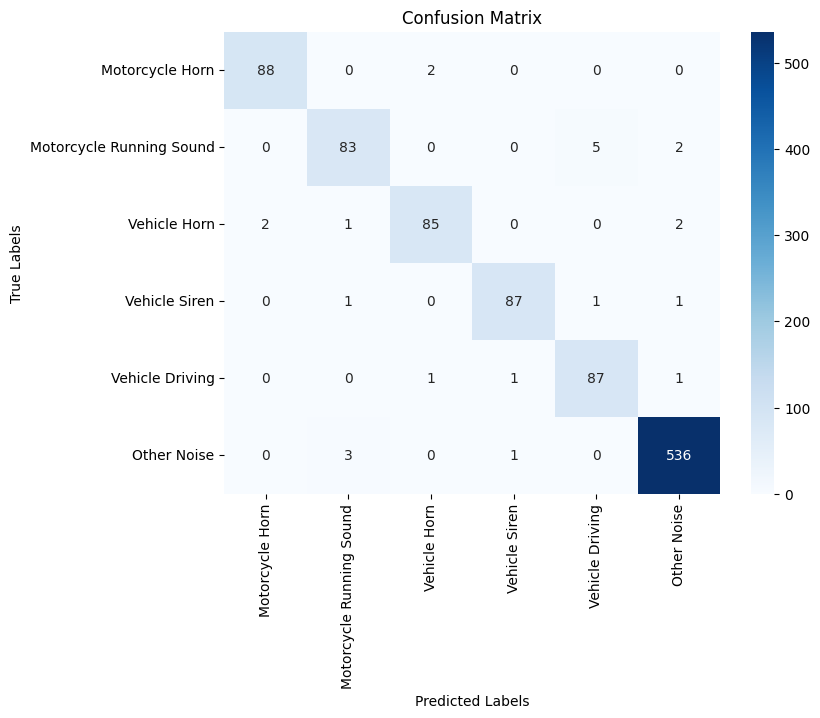

Overall Accuracy: 0.9758


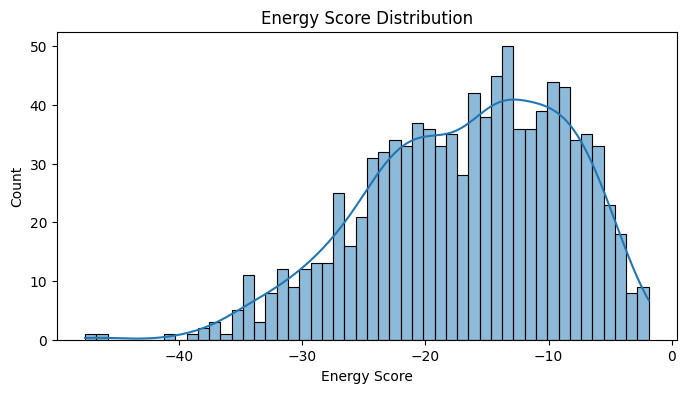


--- Sample Predictions ---
Sample 0: True = 기타소음, Predicted = 기타소음, Energy Score = -11.5521
Sample 1: True = 기타소음, Predicted = 기타소음, Energy Score = -23.0595
Sample 2: True = 기타소음, Predicted = 기타소음, Energy Score = -16.2884
Sample 3: True = 기타소음, Predicted = 기타소음, Energy Score = -31.7990
Sample 4: True = 기타소음, Predicted = 기타소음, Energy Score = -15.7097
Sample 5: True = 기타소음, Predicted = 기타소음, Energy Score = -9.9492
Sample 6: True = 기타소음, Predicted = 기타소음, Energy Score = -8.2780
Sample 7: True = 기타소음, Predicted = 기타소음, Energy Score = -22.3631
Sample 8: True = 기타소음, Predicted = 기타소음, Energy Score = -5.8696
Sample 9: True = 기타소음, Predicted = 기타소음, Energy Score = -8.5291


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import logging

# 로깅 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 전역 변수
MODEL = None
LOGITS_MODEL = None
ENERGY_THRESHOLD = None  # 동적 계산
CONFIDENCE_THRESHOLD = 1.0
TEMPERATURE = 1.0
MEAN_ENERGY_IND = -15.3398  # 초기값
STD_ENERGY_IND = 8.2265     # 초기값

# 라벨 정의
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn',
                  'Vehicle Siren', 'Vehicle Driving', 'Other Noise']
label_to_code = {label: i for i, label in enumerate(final_labels)}
index_to_label = {v: k for k, v in label_to_code.items()}
unknown_label_index = label_to_code['기타소음']

# 모델 초기화
def initialize_models(model_path="model/resnet_model_modified_v6.h5"):
    global MODEL, LOGITS_MODEL
    try:
        if MODEL is None:
            MODEL = load_model(model_path)
            last_layer = MODEL.layers[-1]
            if last_layer.get_config().get("activation") == "softmax":
                logits = Model(inputs=MODEL.input, outputs=MODEL.layers[-2].output)
                new_dense = Dense(last_layer.units, activation=None, name='logits')(logits.output)
                LOGITS_MODEL = Model(inputs=MODEL.input, outputs=new_dense)
                LOGITS_MODEL.layers[-1].set_weights(last_layer.get_weights())
            else:
                LOGITS_MODEL = MODEL
            logging.info(f"모델 {model_path} 로드 완료.")
    except Exception as e:
        logging.error(f"모델 로드 실패: {str(e)}")
        raise

# Energy Score 계산
def compute_energy(logits, T=TEMPERATURE):
    exp_vals = np.exp(logits / T)
    sum_exp = np.sum(exp_vals, axis=1) + 1e-9
    return -T * np.log(sum_exp)

# 데이터 검증 및 전처리
def validate_mfcc_data(mfcc_data):
    try:
        if not isinstance(mfcc_data, np.ndarray):
            mfcc_data = np.asarray(mfcc_data)
        if mfcc_data.ndim == 1:
            mfcc_data = mfcc_data.reshape(1, -1)
        if mfcc_data.shape[1] != 50:
            raise ValueError(f"MFCC 데이터 크기는 (n_samples, 50)이어야 함. 현재: {mfcc_data.shape}")
        if np.any(np.isnan(mfcc_data)) or np.any(np.isinf(mfcc_data)):
            raise ValueError("MFCC 데이터에 NaN 또는 Inf 값이 포함됨")
        return mfcc_data
    except Exception as e:
        logging.error(f"MFCC 데이터 검증 실패: {str(e)}")
        raise

# 통계값 업데이트
def update_energy_stats(energy_scores, preds, window_size=1000, max_std_dev=20.0):
    global MEAN_ENERGY_IND, STD_ENERGY_IND
    if not hasattr(update_energy_stats, 'buffer'):
        update_energy_stats.buffer = []

    ind_scores = energy_scores[preds != unknown_label_index]
    if len(ind_scores) > 0:
        update_energy_stats.buffer.extend(ind_scores)
        if len(update_energy_stats.buffer) > window_size:
            update_energy_stats.buffer = update_energy_stats.buffer[-window_size:]
        
        if len(update_energy_stats.buffer) >= 2:
            new_mean = np.mean(update_energy_stats.buffer)
            new_std = np.std(update_energy_stats.buffer)
            if new_std <= max_std_dev and not np.isnan(new_std):
                MEAN_ENERGY_IND = new_mean
                STD_ENERGY_IND = max(new_std, 1e-6)
                logging.info(f"Updated MEAN_ENERGY_IND: {MEAN_ENERGY_IND:.4f}, STD_ENERGY_IND: {STD_ENERGY_IND:.4f}")

# 예측 함수
def predict_samples(mfcc_data, y_true=None, model_path="model/resnet_model_modified_v6.h5"):
    try:
        if LOGITS_MODEL is None:
            initialize_models(model_path)

        mfcc_data = validate_mfcc_data(mfcc_data)
        X = mfcc_data.reshape(-1, 50, 1)

        global ENERGY_THRESHOLD
        if ENERGY_THRESHOLD is None and y_true is not None:
            # 임계값 계산을 위한 초기 예측
            logits_temp = LOGITS_MODEL.predict(X, verbose=0)
            energy_scores_temp = compute_energy(logits_temp)
            softmax_probs_temp = np.exp(logits_temp) / np.sum(np.exp(logits_temp), axis=1, keepdims=True)
            threshold_candidates = np.linspace(energy_scores_temp.min(), energy_scores_temp.max(), 100)
            best_f1 = -1
            for thr in threshold_candidates:
                temp_preds = np.where((np.max(softmax_probs_temp, axis=1) < CONFIDENCE_THRESHOLD) & 
                                      (energy_scores_temp > thr), unknown_label_index, np.argmax(softmax_probs_temp, axis=1))
                f1 = f1_score(y_true, temp_preds, labels=[unknown_label_index], average='weighted', zero_division=0)
                if f1 > best_f1:
                    best_f1 = f1
                    ENERGY_THRESHOLD = thr
            logging.info(f"최적 Energy Threshold: {ENERGY_THRESHOLD:.4f}, F1-score: {best_f1:.4f}")
        elif ENERGY_THRESHOLD is None:
            ENERGY_THRESHOLD = -27.4814  # 이전 최적값
            logging.warning(f"Default ENERGY_THRESHOLD 사용: {ENERGY_THRESHOLD}")

        # 실제 예측
        logits = LOGITS_MODEL.predict(X, verbose=0)
        energy_scores = compute_energy(logits)
        softmax_probs = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)
        max_probs = np.max(softmax_probs, axis=1)
        basic_preds = np.argmax(softmax_probs, axis=1)
        z_scores = (energy_scores - MEAN_ENERGY_IND) / STD_ENERGY_IND

        final_preds = np.where((max_probs < CONFIDENCE_THRESHOLD) & 
                               (energy_scores > ENERGY_THRESHOLD),
                               unknown_label_index, basic_preds)

        if y_true is not None:
            update_energy_stats(energy_scores, final_preds)

        return final_preds, energy_scores, z_scores
    except Exception as e:
        logging.error(f"예측 중 오류 발생: {str(e)}")
        raise

# 평가 및 시각화 함수
def evaluate_predictions(y_true, y_pred, energy_scores):
    print("\n--- Classification Report ---")
    report = classification_report(y_true, y_pred, target_names=english_labels, zero_division=0)
    print(report)

    cm = confusion_matrix(y_true, y_pred, labels=[label_to_code[l] for l in final_labels])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=english_labels, yticklabels=english_labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    accuracy = accuracy_score(y_true, y_pred)
    print(f"Overall Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(8, 4))
    sns.histplot(energy_scores, bins=50, kde=True)
    plt.title("Energy Score Distribution")
    plt.xlabel("Energy Score")
    plt.show()

# 샘플 예측 출력
def print_sample_predictions(y_true, y_pred, energy_scores, num_samples=10):
    print("\n--- Sample Predictions ---")
    for i in range(min(num_samples, len(y_pred))):
        true_lbl = index_to_label[y_true[i]] if y_true is not None else "Unknown"
        pred_lbl = index_to_label[y_pred[i]]
        eng_score = energy_scores[i]
        print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Energy Score = {eng_score:.4f}")

# 메인 실행
if __name__ == "__main__":
    # 테스트 데이터 로드
    test_file = "final_csv/final_test_sampled_90_category_03.csv"
    df_test = pd.read_csv(test_file)
    mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
    X_test = df_test[mfcc_columns].values
    y_true_ood = df_test['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index)).values

    # 예측 및 평가
    y_pred, energy_scores, z_scores = predict_samples(X_test, y_true_ood)
    evaluate_predictions(y_true_ood, y_pred, energy_scores)
    print_sample_predictions(y_true_ood, y_pred, energy_scores)

2025-03-12 17:36:01,217 - INFO - 모델 model/resnet_model_modified_v6.h5 로드 완료.
2025-03-12 17:36:02,108 - INFO - 최적 Energy Threshold: -27.4814, F1-score: 0.8959
2025-03-12 17:36:02,514 - INFO - Updated MEAN_ENERGY_IND: -7.4233, STD_ENERGY_IND: 3.2403



--- Classification Report ---
                          precision    recall  f1-score   support

         Motorcycle Horn       0.00      0.00      0.00         0
Motorcycle Running Sound       0.00      0.00      0.00         0
            Vehicle Horn       0.00      0.00      0.00         0
           Vehicle Siren       0.00      0.00      0.00         0
         Vehicle Driving       0.00      0.00      0.00         0
             Other Noise       1.00      0.81      0.90      1374

                accuracy                           0.81      1374
               macro avg       0.17      0.14      0.15      1374
            weighted avg       1.00      0.81      0.90      1374



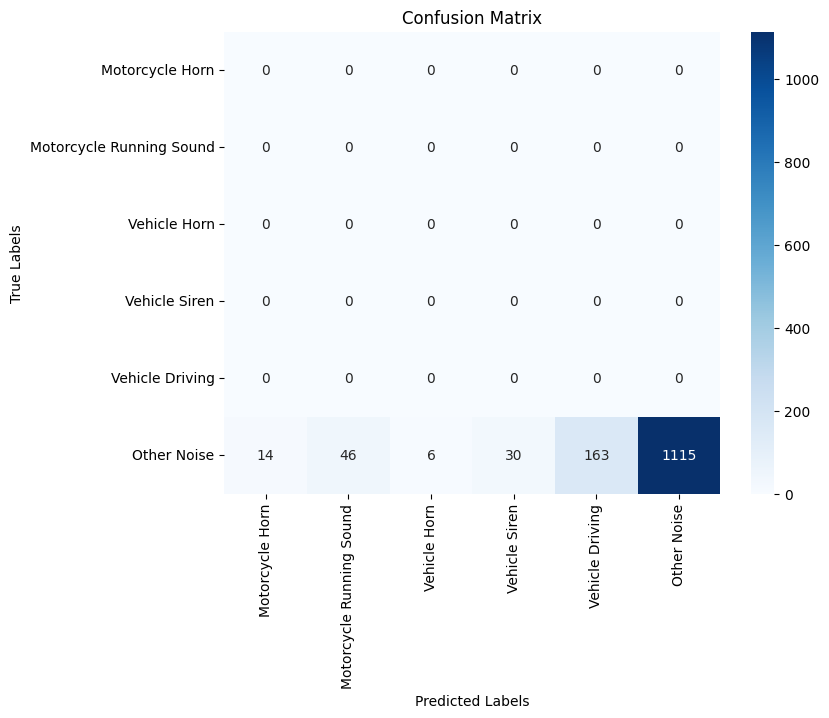

Overall Accuracy: 0.8115


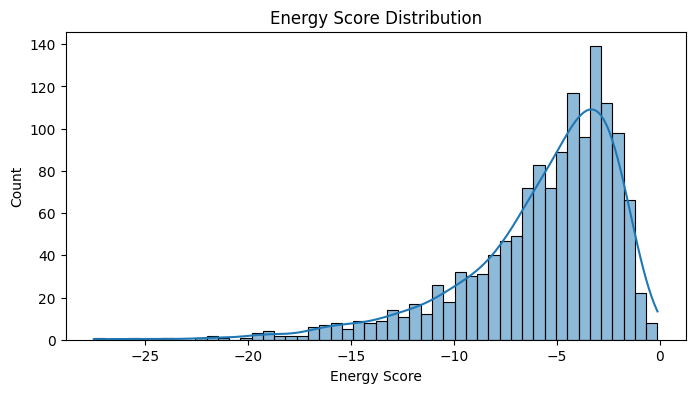


--- Sample Predictions ---
Sample 0: True = 기타소음, Predicted = 기타소음, Energy Score = -5.4858
Sample 1: True = 기타소음, Predicted = 기타소음, Energy Score = -4.0147
Sample 2: True = 기타소음, Predicted = 기타소음, Energy Score = -5.9335
Sample 3: True = 기타소음, Predicted = 기타소음, Energy Score = -7.7172
Sample 4: True = 기타소음, Predicted = 기타소음, Energy Score = -2.0617
Sample 5: True = 기타소음, Predicted = 기타소음, Energy Score = -3.0168
Sample 6: True = 기타소음, Predicted = 이륜차경적, Energy Score = -5.9419
Sample 7: True = 기타소음, Predicted = 기타소음, Energy Score = -2.7637
Sample 8: True = 기타소음, Predicted = 기타소음, Energy Score = -9.5543
Sample 9: True = 기타소음, Predicted = 기타소음, Energy Score = -10.6599


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import logging

# 로깅 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 전역 변수
MODEL = None
LOGITS_MODEL = None
ENERGY_THRESHOLD = None  # 동적 계산
CONFIDENCE_THRESHOLD = 0.99
TEMPERATURE = 1.0
MEAN_ENERGY_IND = -15.3398  # 초기값
STD_ENERGY_IND = 8.2265     # 초기값

# 라벨 정의
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn',
                  'Vehicle Siren', 'Vehicle Driving', 'Other Noise']
label_to_code = {label: i for i, label in enumerate(final_labels)}
index_to_label = {v: k for k, v in label_to_code.items()}
unknown_label_index = label_to_code['기타소음']

# 모델 초기화
def initialize_models(model_path="model/resnet_model_modified_v6.h5"):
    global MODEL, LOGITS_MODEL
    try:
        if MODEL is None:
            MODEL = load_model(model_path)
            last_layer = MODEL.layers[-1]
            if last_layer.get_config().get("activation") == "softmax":
                logits = Model(inputs=MODEL.input, outputs=MODEL.layers[-2].output)
                new_dense = Dense(last_layer.units, activation=None, name='logits')(logits.output)
                LOGITS_MODEL = Model(inputs=MODEL.input, outputs=new_dense)
                LOGITS_MODEL.layers[-1].set_weights(last_layer.get_weights())
            else:
                LOGITS_MODEL = MODEL
            logging.info(f"모델 {model_path} 로드 완료.")
    except Exception as e:
        logging.error(f"모델 로드 실패: {str(e)}")
        raise

# Energy Score 계산
def compute_energy(logits, T=TEMPERATURE):
    exp_vals = np.exp(logits / T)
    sum_exp = np.sum(exp_vals, axis=1) + 1e-9
    return -T * np.log(sum_exp)

# 데이터 검증 및 전처리
def validate_mfcc_data(mfcc_data):
    try:
        if not isinstance(mfcc_data, np.ndarray):
            mfcc_data = np.asarray(mfcc_data)
        if mfcc_data.ndim == 1:
            mfcc_data = mfcc_data.reshape(1, -1)
        if mfcc_data.shape[1] != 50:
            raise ValueError(f"MFCC 데이터 크기는 (n_samples, 50)이어야 함. 현재: {mfcc_data.shape}")
        if np.any(np.isnan(mfcc_data)) or np.any(np.isinf(mfcc_data)):
            raise ValueError("MFCC 데이터에 NaN 또는 Inf 값이 포함됨")
        return mfcc_data
    except Exception as e:
        logging.error(f"MFCC 데이터 검증 실패: {str(e)}")
        raise

# 통계값 업데이트
def update_energy_stats(energy_scores, preds, window_size=1000, max_std_dev=20.0):
    global MEAN_ENERGY_IND, STD_ENERGY_IND
    if not hasattr(update_energy_stats, 'buffer'):
        update_energy_stats.buffer = []

    ind_scores = energy_scores[preds != unknown_label_index]
    if len(ind_scores) > 0:
        update_energy_stats.buffer.extend(ind_scores)
        if len(update_energy_stats.buffer) > window_size:
            update_energy_stats.buffer = update_energy_stats.buffer[-window_size:]
        
        if len(update_energy_stats.buffer) >= 2:
            new_mean = np.mean(update_energy_stats.buffer)
            new_std = np.std(update_energy_stats.buffer)
            if new_std <= max_std_dev and not np.isnan(new_std):
                MEAN_ENERGY_IND = new_mean
                STD_ENERGY_IND = max(new_std, 1e-6)
                logging.info(f"Updated MEAN_ENERGY_IND: {MEAN_ENERGY_IND:.4f}, STD_ENERGY_IND: {STD_ENERGY_IND:.4f}")

# 예측 함수
def predict_samples(mfcc_data, y_true=None, model_path="model/resnet_model_modified_v6.h5"):
    try:
        if LOGITS_MODEL is None:
            initialize_models(model_path)

        mfcc_data = validate_mfcc_data(mfcc_data)
        X = mfcc_data.reshape(-1, 50, 1)

        global ENERGY_THRESHOLD
        if ENERGY_THRESHOLD is None and y_true is not None:
            # 임계값 계산을 위한 초기 예측
            logits_temp = LOGITS_MODEL.predict(X, verbose=0)
            energy_scores_temp = compute_energy(logits_temp)
            softmax_probs_temp = np.exp(logits_temp) / np.sum(np.exp(logits_temp), axis=1, keepdims=True)
            threshold_candidates = np.linspace(energy_scores_temp.min(), energy_scores_temp.max(), 100)
            best_f1 = -1
            for thr in threshold_candidates:
                temp_preds = np.where((np.max(softmax_probs_temp, axis=1) < CONFIDENCE_THRESHOLD) & 
                                      (energy_scores_temp > thr), unknown_label_index, np.argmax(softmax_probs_temp, axis=1))
                f1 = f1_score(y_true, temp_preds, labels=[unknown_label_index], average='weighted', zero_division=0)
                if f1 > best_f1:
                    best_f1 = f1
                    ENERGY_THRESHOLD = thr
            logging.info(f"최적 Energy Threshold: {ENERGY_THRESHOLD:.4f}, F1-score: {best_f1:.4f}")
        elif ENERGY_THRESHOLD is None:
            ENERGY_THRESHOLD = -27.4814  # 이전 최적값
            logging.warning(f"Default ENERGY_THRESHOLD 사용: {ENERGY_THRESHOLD}")

        # 실제 예측
        logits = LOGITS_MODEL.predict(X, verbose=0)
        energy_scores = compute_energy(logits)
        softmax_probs = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)
        max_probs = np.max(softmax_probs, axis=1)
        basic_preds = np.argmax(softmax_probs, axis=1)
        z_scores = (energy_scores - MEAN_ENERGY_IND) / STD_ENERGY_IND

        final_preds = np.where((max_probs < CONFIDENCE_THRESHOLD) & 
                               (energy_scores > ENERGY_THRESHOLD),
                               unknown_label_index, basic_preds)

        if y_true is not None:
            update_energy_stats(energy_scores, final_preds)

        return final_preds, energy_scores, z_scores
    except Exception as e:
        logging.error(f"예측 중 오류 발생: {str(e)}")
        raise

# 평가 및 시각화 함수
def evaluate_predictions(y_true, y_pred, energy_scores):
    print("\n--- Classification Report ---")
    report = classification_report(y_true, y_pred, target_names=english_labels, zero_division=0)
    print(report)

    cm = confusion_matrix(y_true, y_pred, labels=[label_to_code[l] for l in final_labels])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=english_labels, yticklabels=english_labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    accuracy = accuracy_score(y_true, y_pred)
    print(f"Overall Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(8, 4))
    sns.histplot(energy_scores, bins=50, kde=True)
    plt.title("Energy Score Distribution")
    plt.xlabel("Energy Score")
    plt.show()

# 샘플 예측 출력
def print_sample_predictions(y_true, y_pred, energy_scores, num_samples=10):
    print("\n--- Sample Predictions ---")
    for i in range(min(num_samples, len(y_pred))):
        true_lbl = index_to_label[y_true[i]] if y_true is not None else "Unknown"
        pred_lbl = index_to_label[y_pred[i]]
        eng_score = energy_scores[i]
        print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Energy Score = {eng_score:.4f}")

# 메인 실행
if __name__ == "__main__":
    # 테스트 데이터 로드
    test_file = "final_csv/untrained other noises.csv"
    df_test = pd.read_csv(test_file)
    mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
    X_test = df_test[mfcc_columns].values
    y_true_ood = df_test['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index)).values

    # 예측 및 평가
    y_pred, energy_scores, z_scores = predict_samples(X_test, y_true_ood)
    evaluate_predictions(y_true_ood, y_pred, energy_scores)
    print_sample_predictions(y_true_ood, y_pred, energy_scores)

# IV. 기타 시도

2025-03-13 01:02:02,007 - INFO - 모델 model/resnet_model_modified_v6.h5 로드 완료.
2025-03-13 01:02:02,733 - INFO - 최적 Energy Threshold: -27.4814, Recall: 0.8115
2025-03-13 01:02:03,056 - INFO - Updated MEAN_ENERGY_IND: -7.4608, STD_ENERGY_IND: 3.2609



--- Classification Report ---
                          precision    recall  f1-score   support

         Motorcycle Horn       0.00      0.00      0.00         0
Motorcycle Running Sound       0.00      0.00      0.00         0
            Vehicle Horn       0.00      0.00      0.00         0
           Vehicle Siren       0.00      0.00      0.00         0
         Vehicle Driving       0.00      0.00      0.00         0
             Other Noise       1.00      0.81      0.89      1374

                accuracy                           0.81      1374
               macro avg       0.17      0.13      0.15      1374
            weighted avg       1.00      0.81      0.89      1374



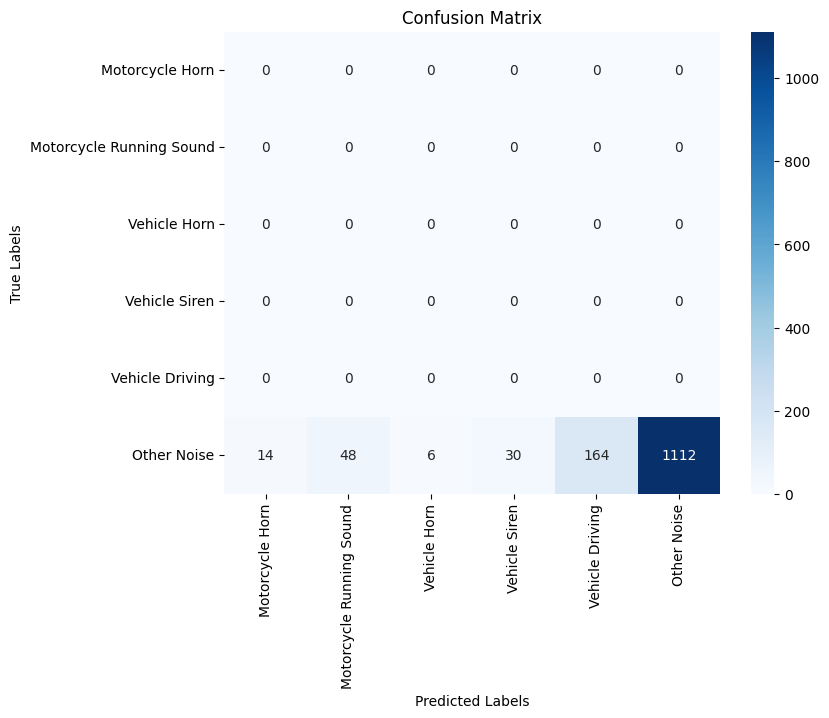

Overall Accuracy: 0.8093


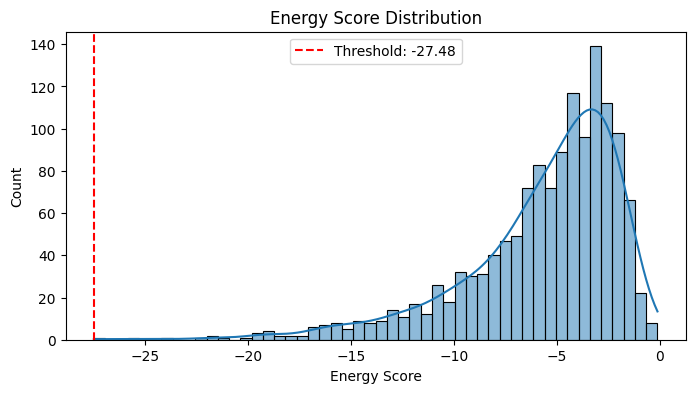


--- Sample Predictions ---
Sample 0: True = 기타소음, Predicted = 기타소음, Energy Score = -5.4858
Sample 1: True = 기타소음, Predicted = 기타소음, Energy Score = -4.0147
Sample 2: True = 기타소음, Predicted = 기타소음, Energy Score = -5.9335
Sample 3: True = 기타소음, Predicted = 기타소음, Energy Score = -7.7172
Sample 4: True = 기타소음, Predicted = 기타소음, Energy Score = -2.0617
Sample 5: True = 기타소음, Predicted = 기타소음, Energy Score = -3.0168
Sample 6: True = 기타소음, Predicted = 이륜차경적, Energy Score = -5.9419
Sample 7: True = 기타소음, Predicted = 기타소음, Energy Score = -2.7637
Sample 8: True = 기타소음, Predicted = 기타소음, Energy Score = -9.5543
Sample 9: True = 기타소음, Predicted = 기타소음, Energy Score = -10.6599


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score
import logging

# 로깅 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 전역 변수
MODEL = None
LOGITS_MODEL = None
ENERGY_THRESHOLD = None  # 동적 계산
CONFIDENCE_THRESHOLD = 0.99  # 0.99 -> 0.9로 조정
TEMPERATURE = 1.0
MEAN_ENERGY_IND = -15.3398  # 초기값
STD_ENERGY_IND = 8.2265     # 초기값

# 라벨 정의
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn',
                  'Vehicle Siren', 'Vehicle Driving', 'Other Noise']
label_to_code = {label: i for i, label in enumerate(final_labels)}
index_to_label = {v: k for k, v in label_to_code.items()}
unknown_label_index = label_to_code['기타소음']

# 모델 초기화
def initialize_models(model_path="model/resnet_model_modified_v6.h5"):
    global MODEL, LOGITS_MODEL
    try:
        if MODEL is None:
            MODEL = load_model(model_path)
            last_layer = MODEL.layers[-1]
            if last_layer.get_config().get("activation") == "softmax":
                logits = Model(inputs=MODEL.input, outputs=MODEL.layers[-2].output)
                new_dense = Dense(last_layer.units, activation=None, name='logits')(logits.output)
                LOGITS_MODEL = Model(inputs=MODEL.input, outputs=new_dense)
                LOGITS_MODEL.layers[-1].set_weights(last_layer.get_weights())
            else:
                LOGITS_MODEL = MODEL
            logging.info(f"모델 {model_path} 로드 완료.")
    except Exception as e:
        logging.error(f"모델 로드 실패: {str(e)}")
        raise

# Energy Score 계산
def compute_energy(logits, T=TEMPERATURE):
    exp_vals = np.exp(logits / T)
    sum_exp = np.sum(exp_vals, axis=1) + 1e-9
    return -T * np.log(sum_exp)

# 데이터 검증 및 전처리
def validate_mfcc_data(mfcc_data):
    try:
        if not isinstance(mfcc_data, np.ndarray):
            mfcc_data = np.asarray(mfcc_data)
        if mfcc_data.ndim == 1:
            mfcc_data = mfcc_data.reshape(1, -1)
        if mfcc_data.shape[1] != 50:
            raise ValueError(f"MFCC 데이터 크기는 (n_samples, 50)이어야 함. 현재: {mfcc_data.shape}")
        if np.any(np.isnan(mfcc_data)) or np.any(np.isinf(mfcc_data)):
            raise ValueError("MFCC 데이터에 NaN 또는 Inf 값이 포함됨")
        return mfcc_data
    except Exception as e:
        logging.error(f"MFCC 데이터 검증 실패: {str(e)}")
        raise

# 통계값 업데이트
def update_energy_stats(energy_scores, preds, window_size=1000, max_std_dev=20.0):
    global MEAN_ENERGY_IND, STD_ENERGY_IND
    if not hasattr(update_energy_stats, 'buffer'):
        update_energy_stats.buffer = []

    ind_scores = energy_scores[preds != unknown_label_index]
    if len(ind_scores) > 0:
        update_energy_stats.buffer.extend(ind_scores)
        if len(update_energy_stats.buffer) > window_size:
            update_energy_stats.buffer = update_energy_stats.buffer[-window_size:]
        
        if len(update_energy_stats.buffer) >= 2:
            new_mean = np.mean(update_energy_stats.buffer)
            new_std = np.std(update_energy_stats.buffer)
            if new_std <= max_std_dev and not np.isnan(new_std):
                MEAN_ENERGY_IND = new_mean
                STD_ENERGY_IND = max(new_std, 1e-6)
                logging.info(f"Updated MEAN_ENERGY_IND: {MEAN_ENERGY_IND:.4f}, STD_ENERGY_IND: {STD_ENERGY_IND:.4f}")

# 예측 함수
def predict_samples(mfcc_data, y_true=None, model_path="model/resnet_model_modified_v6.h5"):
    try:
        if LOGITS_MODEL is None:
            initialize_models(model_path)

        mfcc_data = validate_mfcc_data(mfcc_data)
        X = mfcc_data.reshape(-1, 50, 1)

        global ENERGY_THRESHOLD
        if ENERGY_THRESHOLD is None and y_true is not None:
            logits_temp = LOGITS_MODEL.predict(X, verbose=0)
            energy_scores_temp = compute_energy(logits_temp)
            softmax_probs_temp = np.exp(logits_temp) / np.sum(np.exp(logits_temp), axis=1, keepdims=True)
            threshold_candidates = np.linspace(energy_scores_temp.min(), energy_scores_temp.max(), 100)
            best_recall = -1  # Recall 우선 최적화
            for thr in threshold_candidates:
                temp_preds = np.where((np.max(softmax_probs_temp, axis=1) < CONFIDENCE_THRESHOLD) & 
                                      (energy_scores_temp > thr), unknown_label_index, np.argmax(softmax_probs_temp, axis=1))
                recall = recall_score(y_true, temp_preds, labels=[unknown_label_index], average='weighted', zero_division=0)
                if recall > best_recall:
                    best_recall = recall
                    ENERGY_THRESHOLD = thr
            logging.info(f"최적 Energy Threshold: {ENERGY_THRESHOLD:.4f}, Recall: {best_recall:.4f}")
        elif ENERGY_THRESHOLD is None:
            ENERGY_THRESHOLD = -27.4814
            logging.warning(f"Default ENERGY_THRESHOLD 사용: {ENERGY_THRESHOLD}")

        logits = LOGITS_MODEL.predict(X, verbose=0)
        energy_scores = compute_energy(logits)
        softmax_probs = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)
        max_probs = np.max(softmax_probs, axis=1)
        basic_preds = np.argmax(softmax_probs, axis=1)
        z_scores = (energy_scores - MEAN_ENERGY_IND) / STD_ENERGY_IND

        final_preds = np.where((max_probs < CONFIDENCE_THRESHOLD) & 
                               (energy_scores > ENERGY_THRESHOLD) & 
                               (z_scores > 1.0),  # Z-score 조건 추가
                               unknown_label_index, basic_preds)

        if y_true is not None:
            update_energy_stats(energy_scores, final_preds)

        return final_preds, energy_scores, z_scores
    except Exception as e:
        logging.error(f"예측 중 오류 발생: {str(e)}")
        raise

# 평가 및 시각화 함수
def evaluate_predictions(y_true, y_pred, energy_scores):
    print("\n--- Classification Report ---")
    report = classification_report(y_true, y_pred, target_names=english_labels, zero_division=0)
    print(report)

    cm = confusion_matrix(y_true, y_pred, labels=[label_to_code[l] for l in final_labels])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=english_labels, yticklabels=english_labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    accuracy = accuracy_score(y_true, y_pred)
    print(f"Overall Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(8, 4))
    sns.histplot(energy_scores, bins=50, kde=True)
    plt.axvline(x=ENERGY_THRESHOLD, color='r', linestyle='--', label=f"Threshold: {ENERGY_THRESHOLD:.2f}")
    plt.title("Energy Score Distribution")
    plt.xlabel("Energy Score")
    plt.legend()
    plt.show()

# 샘플 예측 출력
def print_sample_predictions(y_true, y_pred, energy_scores, num_samples=10):
    print("\n--- Sample Predictions ---")
    for i in range(min(num_samples, len(y_pred))):
        true_lbl = index_to_label[y_true[i]] if y_true is not None else "Unknown"
        pred_lbl = index_to_label[y_pred[i]]
        eng_score = energy_scores[i]
        print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Energy Score = {eng_score:.4f}")

# 메인 실행
if __name__ == "__main__":
    # 테스트 데이터 로드
    test_file = "final_csv/untrained other noises.csv"
    df_test = pd.read_csv(test_file)
    mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
    X_test = df_test[mfcc_columns].values
    y_true_ood = df_test['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index)).values

    # 예측 및 평가
    y_pred, energy_scores, z_scores = predict_samples(X_test, y_true_ood)
    evaluate_predictions(y_true_ood, y_pred, energy_scores)
    print_sample_predictions(y_true_ood, y_pred, energy_scores)


Testing with final_csv/final_test_sampled_90_category_03.csv


2025-03-13 01:43:44,069 - INFO - 모델 model/resnet_model_modified_v6.h5 로드 완료.
2025-03-13 01:43:44,703 - INFO - 최적 Energy Threshold: -2.3219, Recall: 0.9768



--- Classification Report ---
                          precision    recall  f1-score   support

         Motorcycle Horn       0.98      0.98      0.98        90
Motorcycle Running Sound       0.97      0.92      0.94        90
            Vehicle Horn       0.98      0.94      0.96        90
           Vehicle Siren       0.98      0.97      0.97        90
         Vehicle Driving       0.95      0.97      0.96        90
             Other Noise       0.98      0.99      0.99       540

                accuracy                           0.98       990
               macro avg       0.97      0.96      0.97       990
            weighted avg       0.98      0.98      0.98       990



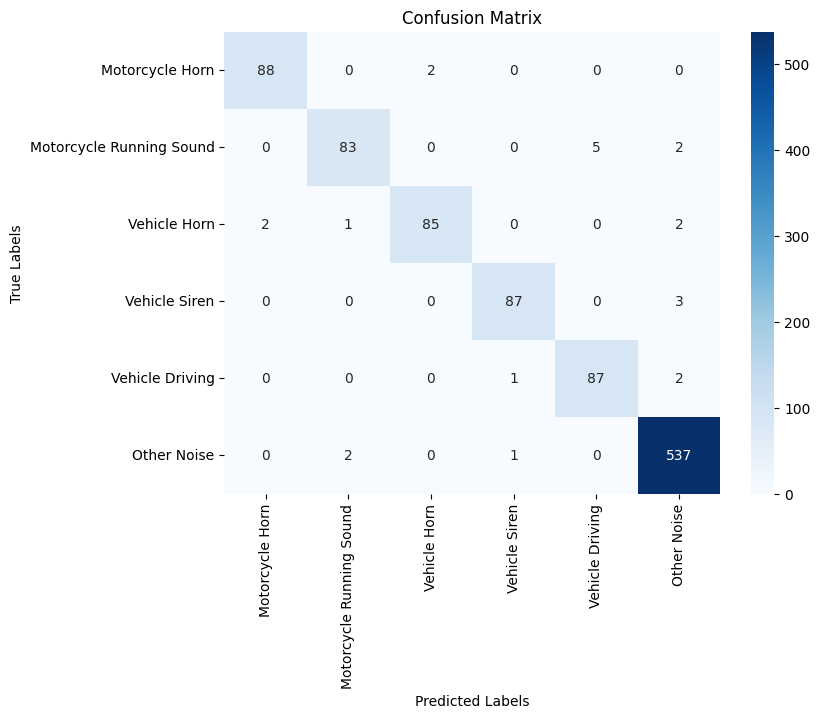

Overall Accuracy: 0.9768


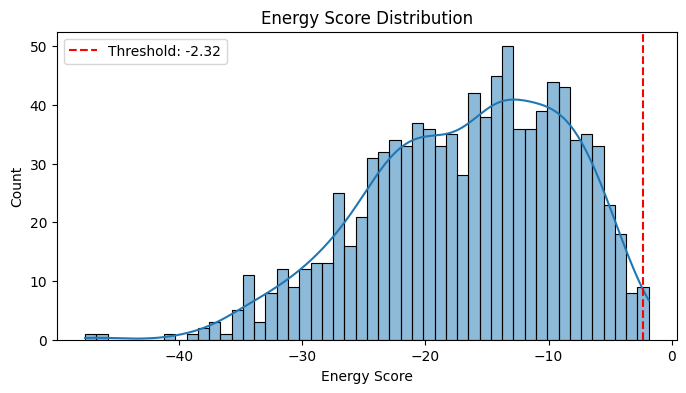


--- Sample Predictions ---
Sample 0: True = 기타소음, Predicted = 기타소음, Energy Score = -11.5521
Sample 1: True = 기타소음, Predicted = 기타소음, Energy Score = -23.0595
Sample 2: True = 기타소음, Predicted = 기타소음, Energy Score = -16.2884
Sample 3: True = 기타소음, Predicted = 기타소음, Energy Score = -31.7990
Sample 4: True = 기타소음, Predicted = 기타소음, Energy Score = -15.7097
Sample 5: True = 기타소음, Predicted = 기타소음, Energy Score = -9.9492
Sample 6: True = 기타소음, Predicted = 기타소음, Energy Score = -8.2780
Sample 7: True = 기타소음, Predicted = 기타소음, Energy Score = -22.3631
Sample 8: True = 기타소음, Predicted = 기타소음, Energy Score = -5.8696
Sample 9: True = 기타소음, Predicted = 기타소음, Energy Score = -8.5291

Testing with final_csv/untrained other noises.csv

--- Classification Report ---
                          precision    recall  f1-score   support

         Motorcycle Horn       0.00      0.00      0.00         0
Motorcycle Running Sound       0.00      0.00      0.00         0
            Vehicle Horn       0.00      0.00

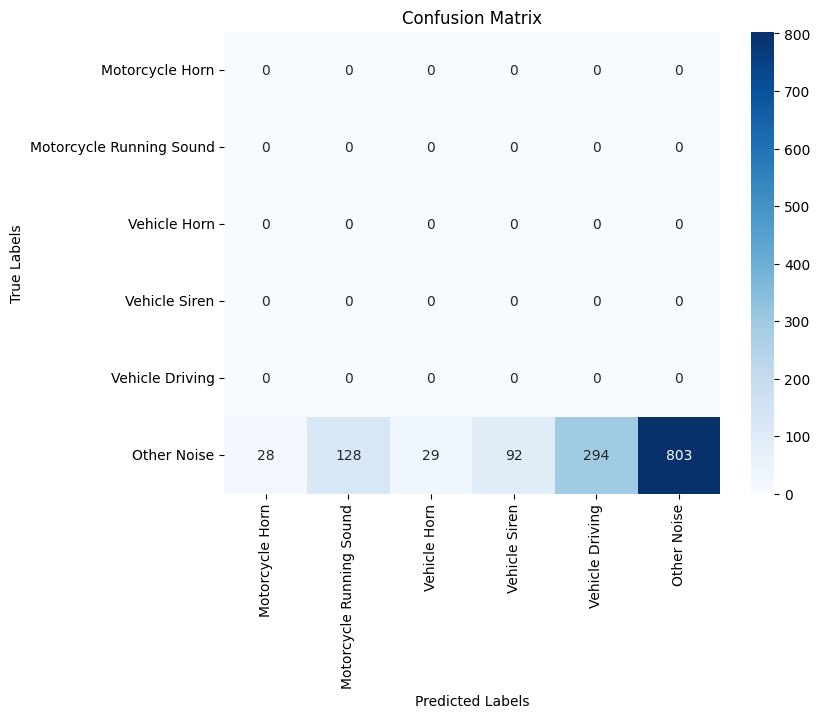

Overall Accuracy: 0.5844


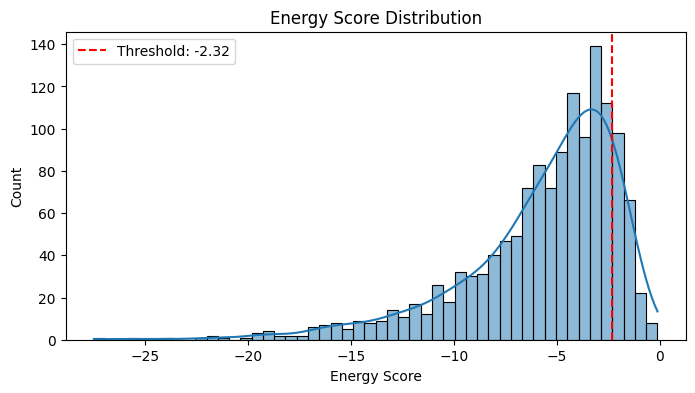


--- Sample Predictions ---
Sample 0: True = 기타소음, Predicted = 기타소음, Energy Score = -5.4858
Sample 1: True = 기타소음, Predicted = 차량사이렌, Energy Score = -4.0147
Sample 2: True = 기타소음, Predicted = 기타소음, Energy Score = -5.9335
Sample 3: True = 기타소음, Predicted = 기타소음, Energy Score = -7.7172
Sample 4: True = 기타소음, Predicted = 기타소음, Energy Score = -2.0617
Sample 5: True = 기타소음, Predicted = 차량경적, Energy Score = -3.0168
Sample 6: True = 기타소음, Predicted = 이륜차경적, Energy Score = -5.9419
Sample 7: True = 기타소음, Predicted = 기타소음, Energy Score = -2.7637
Sample 8: True = 기타소음, Predicted = 기타소음, Energy Score = -9.5543
Sample 9: True = 기타소음, Predicted = 기타소음, Energy Score = -10.6599


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score
import logging

# 로깅 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 전역 변수
MODEL = None
LOGITS_MODEL = None
ENERGY_THRESHOLD = None
CONFIDENCE_THRESHOLD = 0.95  # 중간값
TEMPERATURE = 1.0

# 라벨 정의
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn',
                  'Vehicle Siren', 'Vehicle Driving', 'Other Noise']
label_to_code = {label: i for i, label in enumerate(final_labels)}
index_to_label = {v: k for k, v in label_to_code.items()}
unknown_label_index = label_to_code['기타소음']

# 모델 초기화
def initialize_models(model_path="model/resnet_model_modified_v6.h5"):
    global MODEL, LOGITS_MODEL
    try:
        if MODEL is None:
            MODEL = load_model(model_path)
            last_layer = MODEL.layers[-1]
            if last_layer.get_config().get("activation") == "softmax":
                logits = Model(inputs=MODEL.input, outputs=MODEL.layers[-2].output)
                new_dense = Dense(last_layer.units, activation=None, name='logits')(logits.output)
                LOGITS_MODEL = Model(inputs=MODEL.input, outputs=new_dense)
                LOGITS_MODEL.layers[-1].set_weights(last_layer.get_weights())
            else:
                LOGITS_MODEL = MODEL
            logging.info(f"모델 {model_path} 로드 완료.")
    except Exception as e:
        logging.error(f"모델 로드 실패: {str(e)}")
        raise

# Energy Score 계산
def compute_energy(logits, T=TEMPERATURE):
    exp_vals = np.exp(logits / T)
    sum_exp = np.sum(exp_vals, axis=1) + 1e-9
    return -T * np.log(sum_exp)

# 데이터 검증 및 전처리
def validate_mfcc_data(mfcc_data):
    try:
        if not isinstance(mfcc_data, np.ndarray):
            mfcc_data = np.asarray(mfcc_data)
        if mfcc_data.ndim == 1:
            mfcc_data = mfcc_data.reshape(1, -1)
        if mfcc_data.shape[1] != 50:
            raise ValueError(f"MFCC 데이터 크기는 (n_samples, 50)이어야 함. 현재: {mfcc_data.shape}")
        if np.any(np.isnan(mfcc_data)) or np.any(np.isinf(mfcc_data)):
            raise ValueError("MFCC 데이터에 NaN 또는 Inf 값이 포함됨")
        return mfcc_data
    except Exception as e:
        logging.error(f"MFCC 데이터 검증 실패: {str(e)}")
        raise

# 예측 함수
def predict_samples(mfcc_data, y_true=None, model_path="model/resnet_model_modified_v6.h5"):
    try:
        if LOGITS_MODEL is None:
            initialize_models(model_path)

        mfcc_data = validate_mfcc_data(mfcc_data)
        X = mfcc_data.reshape(-1, 50, 1)

        global ENERGY_THRESHOLD
        if ENERGY_THRESHOLD is None and y_true is not None:
            logits_temp = LOGITS_MODEL.predict(X, verbose=0)
            energy_scores_temp = compute_energy(logits_temp)
            softmax_probs_temp = np.exp(logits_temp) / np.sum(np.exp(logits_temp), axis=1, keepdims=True)
            threshold_candidates = np.linspace(energy_scores_temp.min(), energy_scores_temp.max(), 100)
            best_recall = -1
            for thr in threshold_candidates:
                temp_preds = np.where((np.max(softmax_probs_temp, axis=1) < CONFIDENCE_THRESHOLD) & 
                                      (energy_scores_temp > thr), unknown_label_index, np.argmax(softmax_probs_temp, axis=1))
                recall = recall_score(y_true, temp_preds, average='weighted', zero_division=0)
                if recall > best_recall:
                    best_recall = recall
                    ENERGY_THRESHOLD = thr
            logging.info(f"최적 Energy Threshold: {ENERGY_THRESHOLD:.4f}, Recall: {best_recall:.4f}")
        elif ENERGY_THRESHOLD is None:
            ENERGY_THRESHOLD = -27.4814
            logging.warning(f"Default ENERGY_THRESHOLD 사용: {ENERGY_THRESHOLD}")

        logits = LOGITS_MODEL.predict(X, verbose=0)
        energy_scores = compute_energy(logits)
        softmax_probs = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)
        max_probs = np.max(softmax_probs, axis=1)
        basic_preds = np.argmax(softmax_probs, axis=1)

        final_preds = np.where((max_probs < CONFIDENCE_THRESHOLD) & 
                               (energy_scores > ENERGY_THRESHOLD),
                               unknown_label_index, basic_preds)

        return final_preds, energy_scores, None
    except Exception as e:
        logging.error(f"예측 중 오류 발생: {str(e)}")
        raise

# 평가 및 시각화 함수
def evaluate_predictions(y_true, y_pred, energy_scores):
    print("\n--- Classification Report ---")
    report = classification_report(y_true, y_pred, target_names=english_labels, zero_division=0)
    print(report)

    cm = confusion_matrix(y_true, y_pred, labels=[label_to_code[l] for l in final_labels])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=english_labels, yticklabels=english_labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    accuracy = accuracy_score(y_true, y_pred)
    print(f"Overall Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(8, 4))
    sns.histplot(energy_scores, bins=50, kde=True)
    plt.axvline(x=ENERGY_THRESHOLD, color='r', linestyle='--', label=f"Threshold: {ENERGY_THRESHOLD:.2f}")
    plt.title("Energy Score Distribution")
    plt.xlabel("Energy Score")
    plt.legend()
    plt.show()

# 샘플 예측 출력
def print_sample_predictions(y_true, y_pred, energy_scores, num_samples=10):
    print("\n--- Sample Predictions ---")
    for i in range(min(num_samples, len(y_pred))):
        true_lbl = index_to_label[y_true[i]] if y_true is not None else "Unknown"
        pred_lbl = index_to_label[y_pred[i]]
        eng_score = energy_scores[i]
        print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Energy Score = {eng_score:.4f}")

# 메인 실행
if __name__ == "__main__":
    # 테스트 데이터 로드 (두 파일 모두 테스트)
    for test_file in ["final_csv/final_test_sampled_90_category_03.csv", "final_csv/untrained other noises.csv"]:
        print(f"\nTesting with {test_file}")
        df_test = pd.read_csv(test_file)
        mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
        X_test = df_test[mfcc_columns].values
        y_true_ood = df_test['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index)).values

        # 예측 및 평가
        y_pred, energy_scores, _ = predict_samples(X_test, y_true_ood)
        evaluate_predictions(y_true_ood, y_pred, energy_scores)
        print_sample_predictions(y_true_ood, y_pred, energy_scores)

Finding optimal thresholds...


2025-03-13 01:56:34,963 - INFO - 모델 model/resnet_model_modified_v6.h5 로드 완료.
2025-03-13 01:56:36,115 - INFO - New best: Conf=0.80, Energy=-27.4814, Score=0.7622 (OOD Recall=0.6252, IND Accuracy=0.9677)
2025-03-13 01:56:47,134 - INFO - New best: Conf=0.85, Energy=-27.4814, Score=0.7753 (OOD Recall=0.6477, IND Accuracy=0.9667)
2025-03-13 01:56:58,086 - INFO - New best: Conf=0.90, Energy=-27.4814, Score=0.7950 (OOD Recall=0.6820, IND Accuracy=0.9646)
2025-03-13 01:57:09,069 - INFO - New best: Conf=0.95, Energy=-27.4814, Score=0.8192 (OOD Recall=0.7263, IND Accuracy=0.9586)



Optimal Thresholds: CONFIDENCE_THRESHOLD=0.95, ENERGY_THRESHOLD=-27.4814

Testing with final_csv/untrained other noises.csv

--- Classification Report ---
                          precision    recall  f1-score   support

         Motorcycle Horn       0.00      0.00      0.00         0
Motorcycle Running Sound       0.00      0.00      0.00         0
            Vehicle Horn       0.00      0.00      0.00         0
           Vehicle Siren       0.00      0.00      0.00         0
         Vehicle Driving       0.00      0.00      0.00         0
             Other Noise       1.00      0.73      0.84      1374

                accuracy                           0.73      1374
               macro avg       0.17      0.12      0.14      1374
            weighted avg       1.00      0.73      0.84      1374



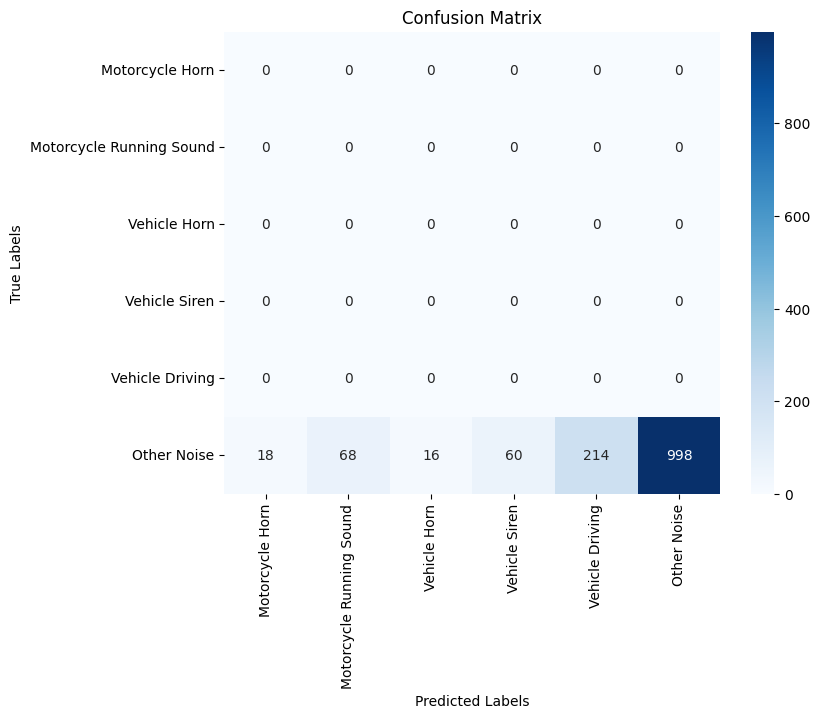

Overall Accuracy: 0.7263


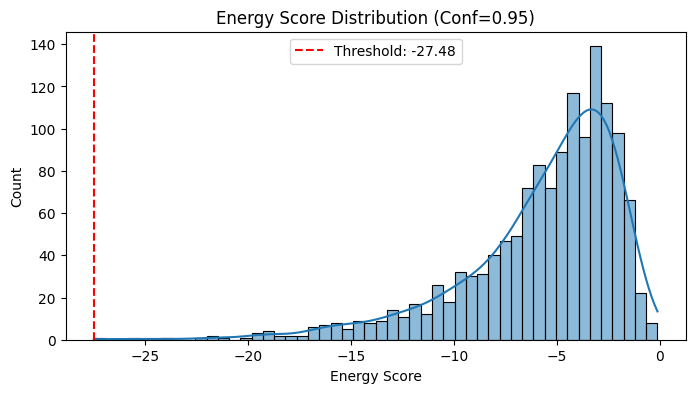


--- Sample Predictions ---
Sample 0: True = 기타소음, Predicted = 기타소음, Energy Score = -5.4858
Sample 1: True = 기타소음, Predicted = 차량사이렌, Energy Score = -4.0147
Sample 2: True = 기타소음, Predicted = 기타소음, Energy Score = -5.9335
Sample 3: True = 기타소음, Predicted = 기타소음, Energy Score = -7.7172
Sample 4: True = 기타소음, Predicted = 기타소음, Energy Score = -2.0617
Sample 5: True = 기타소음, Predicted = 기타소음, Energy Score = -3.0168
Sample 6: True = 기타소음, Predicted = 이륜차경적, Energy Score = -5.9419
Sample 7: True = 기타소음, Predicted = 기타소음, Energy Score = -2.7637
Sample 8: True = 기타소음, Predicted = 기타소음, Energy Score = -9.5543
Sample 9: True = 기타소음, Predicted = 기타소음, Energy Score = -10.6599

Testing with final_csv/final_test_sampled_90_category_03.csv

--- Classification Report ---
                          precision    recall  f1-score   support

         Motorcycle Horn       0.99      0.96      0.97        90
Motorcycle Running Sound       0.97      0.82      0.89        90
            Vehicle Horn       0.97  

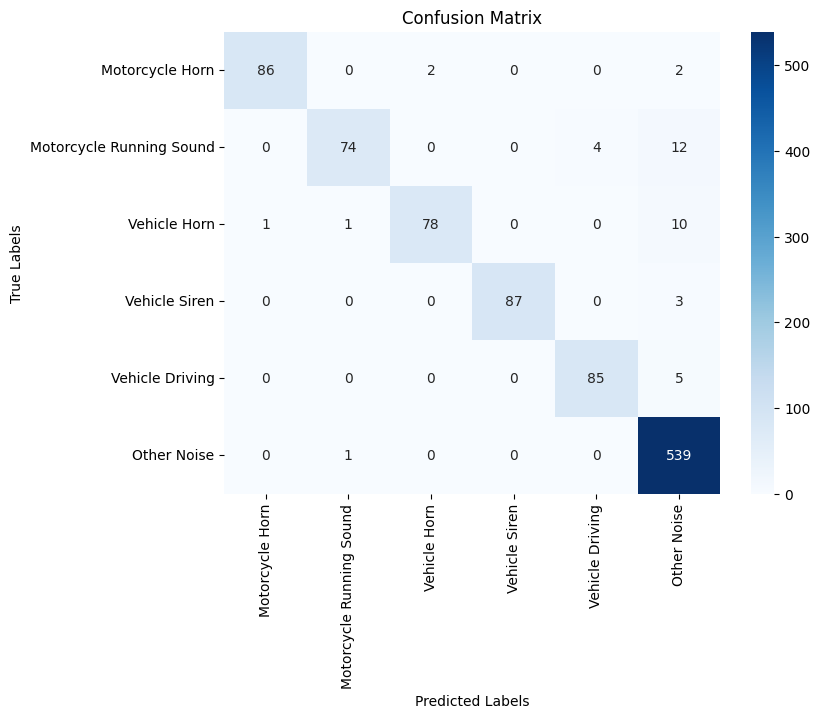

Overall Accuracy: 0.9586


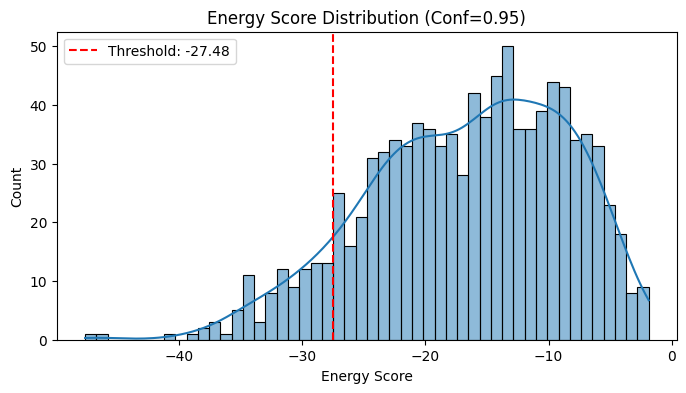


--- Sample Predictions ---
Sample 0: True = 기타소음, Predicted = 기타소음, Energy Score = -11.5521
Sample 1: True = 기타소음, Predicted = 기타소음, Energy Score = -23.0595
Sample 2: True = 기타소음, Predicted = 기타소음, Energy Score = -16.2884
Sample 3: True = 기타소음, Predicted = 기타소음, Energy Score = -31.7990
Sample 4: True = 기타소음, Predicted = 기타소음, Energy Score = -15.7097
Sample 5: True = 기타소음, Predicted = 기타소음, Energy Score = -9.9492
Sample 6: True = 기타소음, Predicted = 기타소음, Energy Score = -8.2780
Sample 7: True = 기타소음, Predicted = 기타소음, Energy Score = -22.3631
Sample 8: True = 기타소음, Predicted = 기타소음, Energy Score = -5.8696
Sample 9: True = 기타소음, Predicted = 기타소음, Energy Score = -8.5291


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
import logging
import itertools

# 로깅 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 전역 변수
MODEL = None
LOGITS_MODEL = None
TEMPERATURE = 1.0

# 라벨 정의
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn',
                  'Vehicle Siren', 'Vehicle Driving', 'Other Noise']
label_to_code = {label: i for i, label in enumerate(final_labels)}
index_to_label = {v: k for k, v in label_to_code.items()}
unknown_label_index = label_to_code['기타소음']

# 모델 초기화
def initialize_models(model_path="model/resnet_model_modified_v6.h5"):
    global MODEL, LOGITS_MODEL
    try:
        if MODEL is None:
            MODEL = load_model(model_path)
            last_layer = MODEL.layers[-1]
            if last_layer.get_config().get("activation") == "softmax":
                logits = Model(inputs=MODEL.input, outputs=MODEL.layers[-2].output)
                new_dense = Dense(last_layer.units, activation=None, name='logits')(logits.output)
                LOGITS_MODEL = Model(inputs=MODEL.input, outputs=new_dense)
                LOGITS_MODEL.layers[-1].set_weights(last_layer.get_weights())
            else:
                LOGITS_MODEL = MODEL
            logging.info(f"모델 {model_path} 로드 완료.")
    except Exception as e:
        logging.error(f"모델 로드 실패: {str(e)}")
        raise

# Energy Score 계산
def compute_energy(logits, T=TEMPERATURE):
    exp_vals = np.exp(logits / T)
    sum_exp = np.sum(exp_vals, axis=1) + 1e-9
    return -T * np.log(sum_exp)

# 데이터 검증 및 전처리
def validate_mfcc_data(mfcc_data):
    try:
        if not isinstance(mfcc_data, np.ndarray):
            mfcc_data = np.asarray(mfcc_data)
        if mfcc_data.ndim == 1:
            mfcc_data = mfcc_data.reshape(1, -1)
        if mfcc_data.shape[1] != 50:
            raise ValueError(f"MFCC 데이터 크기는 (n_samples, 50)이어야 함. 현재: {mfcc_data.shape}")
        if np.any(np.isnan(mfcc_data)) or np.any(np.isinf(mfcc_data)):
            raise ValueError("MFCC 데이터에 NaN 또는 Inf 값이 포함됨")
        return mfcc_data
    except Exception as e:
        logging.error(f"MFCC 데이터 검증 실패: {str(e)}")
        raise

# 예측 함수
def predict_samples(mfcc_data, conf_threshold, energy_threshold):
    try:
        if LOGITS_MODEL is None:
            initialize_models()

        mfcc_data = validate_mfcc_data(mfcc_data)
        X = mfcc_data.reshape(-1, 50, 1)

        logits = LOGITS_MODEL.predict(X, verbose=0)
        energy_scores = compute_energy(logits)
        softmax_probs = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)
        max_probs = np.max(softmax_probs, axis=1)
        basic_preds = np.argmax(softmax_probs, axis=1)

        final_preds = np.where((max_probs < conf_threshold) & 
                               (energy_scores > energy_threshold),
                               unknown_label_index, basic_preds)

        return final_preds, energy_scores
    except Exception as e:
        logging.error(f"예측 중 오류 발생: {str(e)}")
        raise

# 최적 임계값 찾기
def find_optimal_thresholds(X_ood, y_ood, X_ind, y_ind):
    initialize_models()  # 모델 초기화 보장
    conf_candidates = np.arange(0.8, 1.0, 0.05)  # 0.8, 0.85, 0.9, 0.95
    logits_ood = LOGITS_MODEL.predict(X_ood.reshape(-1, 50, 1), verbose=0)
    energy_scores_ood = compute_energy(logits_ood)
    energy_candidates = np.linspace(min(energy_scores_ood), max(energy_scores_ood), 20)

    best_score = -1
    best_conf = None
    best_energy = None

    for conf, energy in itertools.product(conf_candidates, energy_candidates):
        # OOD 데이터 평가
        ood_preds, _ = predict_samples(X_ood, conf, energy)
        ood_recall = recall_score(y_ood, ood_preds, labels=[unknown_label_index], average='weighted', zero_division=0)

        # IND+OOD 데이터 평가
        ind_preds, _ = predict_samples(X_ind, conf, energy)
        ind_accuracy = accuracy_score(y_ind, ind_preds)

        # 결합 스코어: OOD Recall 60% + IND Accuracy 40%
        combined_score = 0.6 * ood_recall + 0.4 * ind_accuracy

        if combined_score > best_score:
            best_score = combined_score
            best_conf = conf
            best_energy = energy
            logging.info(f"New best: Conf={best_conf:.2f}, Energy={best_energy:.4f}, Score={best_score:.4f} "
                         f"(OOD Recall={ood_recall:.4f}, IND Accuracy={ind_accuracy:.4f})")

    return best_conf, best_energy

# 평가 및 시각화 함수
def evaluate_predictions(y_true, y_pred, energy_scores, conf_threshold, energy_threshold):
    print("\n--- Classification Report ---")
    report = classification_report(y_true, y_pred, target_names=english_labels, zero_division=0)
    print(report)

    cm = confusion_matrix(y_true, y_pred, labels=[label_to_code[l] for l in final_labels])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=english_labels, yticklabels=english_labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    accuracy = accuracy_score(y_true, y_pred)
    print(f"Overall Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(8, 4))
    sns.histplot(energy_scores, bins=50, kde=True)
    plt.axvline(x=energy_threshold, color='r', linestyle='--', label=f"Threshold: {energy_threshold:.2f}")
    plt.title(f"Energy Score Distribution (Conf={conf_threshold:.2f})")
    plt.xlabel("Energy Score")
    plt.legend()
    plt.show()

# 샘플 예측 출력
def print_sample_predictions(y_true, y_pred, energy_scores, num_samples=10):
    print("\n--- Sample Predictions ---")
    for i in range(min(num_samples, len(y_pred))):
        true_lbl = index_to_label[y_true[i]] if y_true is not None else "Unknown"
        pred_lbl = index_to_label[y_pred[i]]
        eng_score = energy_scores[i]
        print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Energy Score = {eng_score:.4f}")

# 메인 실행
if __name__ == "__main__":
    # 데이터 로드
    ood_file = "final_csv/untrained other noises.csv"
    ind_file = "final_csv/final_test_sampled_90_category_03.csv"

    df_ood = pd.read_csv(ood_file)
    mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
    X_ood = df_ood[mfcc_columns].values
    y_ood = df_ood['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index)).values

    df_ind = pd.read_csv(ind_file)
    X_ind = df_ind[mfcc_columns].values
    y_ind = df_ind['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index)).values

    # 최적 임계값 찾기
    print("Finding optimal thresholds...")
    best_conf, best_energy = find_optimal_thresholds(X_ood, y_ood, X_ind, y_ind)
    print(f"\nOptimal Thresholds: CONFIDENCE_THRESHOLD={best_conf:.2f}, ENERGY_THRESHOLD={best_energy:.4f}")

    # 최적값으로 두 데이터셋 테스트
    for test_file, X_test, y_true in [(ood_file, X_ood, y_ood), (ind_file, X_ind, y_ind)]:
        print(f"\nTesting with {test_file}")
        y_pred, energy_scores = predict_samples(X_test, best_conf, best_energy)
        evaluate_predictions(y_true, y_pred, energy_scores, best_conf, best_energy)
        print_sample_predictions(y_true, y_pred, energy_scores)

Finding optimal thresholds...


2025-03-13 09:12:01,712 - INFO - 모델 model/resnet_model_modified_v6.h5 로드 완료.
2025-03-13 09:12:03,260 - INFO - New best: Conf=0.90, Energy=-27.4814, Score=0.7668 (OOD Recall=0.6820, IND Accuracy=0.9646)
2025-03-13 09:12:16,124 - INFO - New best: Conf=0.92, Energy=-27.4814, Score=0.7756 (OOD Recall=0.6951, IND Accuracy=0.9636)
2025-03-13 09:12:28,697 - INFO - New best: Conf=0.94, Energy=-27.4814, Score=0.7892 (OOD Recall=0.7162, IND Accuracy=0.9596)
2025-03-13 09:12:41,514 - INFO - New best: Conf=0.96, Energy=-27.4814, Score=0.8049 (OOD Recall=0.7394, IND Accuracy=0.9576)
2025-03-13 09:12:54,412 - INFO - New best: Conf=0.98, Energy=-27.4814, Score=0.8294 (OOD Recall=0.7766, IND Accuracy=0.9525)



Optimal Thresholds: CONFIDENCE_THRESHOLD=0.98, ENERGY_THRESHOLD=-27.4814

Testing with final_csv/untrained other noises.csv

--- Classification Report ---
                          precision    recall  f1-score   support

         Motorcycle Horn       0.00      0.00      0.00         0
Motorcycle Running Sound       0.00      0.00      0.00         0
            Vehicle Horn       0.00      0.00      0.00         0
           Vehicle Siren       0.00      0.00      0.00         0
         Vehicle Driving       0.00      0.00      0.00         0
             Other Noise       1.00      0.78      0.87      1374

                accuracy                           0.78      1374
               macro avg       0.17      0.13      0.15      1374
            weighted avg       1.00      0.78      0.87      1374



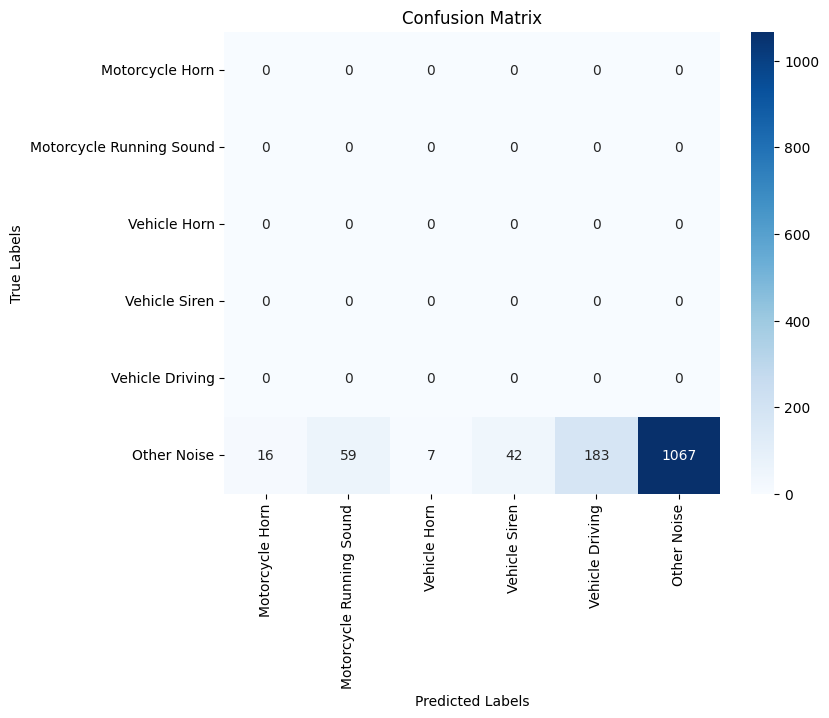

Overall Accuracy: 0.7766


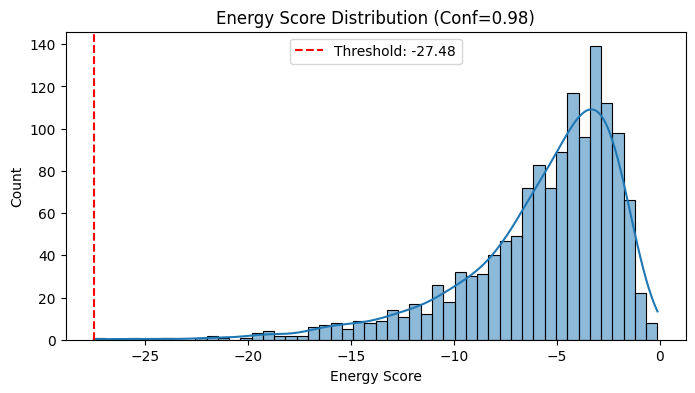


--- Sample Predictions ---
Sample 0: True = 기타소음, Predicted = 기타소음, Energy Score = -5.4858
Sample 1: True = 기타소음, Predicted = 기타소음, Energy Score = -4.0147
Sample 2: True = 기타소음, Predicted = 기타소음, Energy Score = -5.9335
Sample 3: True = 기타소음, Predicted = 기타소음, Energy Score = -7.7172
Sample 4: True = 기타소음, Predicted = 기타소음, Energy Score = -2.0617
Sample 5: True = 기타소음, Predicted = 기타소음, Energy Score = -3.0168
Sample 6: True = 기타소음, Predicted = 이륜차경적, Energy Score = -5.9419
Sample 7: True = 기타소음, Predicted = 기타소음, Energy Score = -2.7637
Sample 8: True = 기타소음, Predicted = 기타소음, Energy Score = -9.5543
Sample 9: True = 기타소음, Predicted = 기타소음, Energy Score = -10.6599

Testing with final_csv/final_test_sampled_90_category_03.csv

--- Classification Report ---
                          precision    recall  f1-score   support

         Motorcycle Horn       1.00      0.94      0.97        90
Motorcycle Running Sound       1.00      0.81      0.90        90
            Vehicle Horn       0.97   

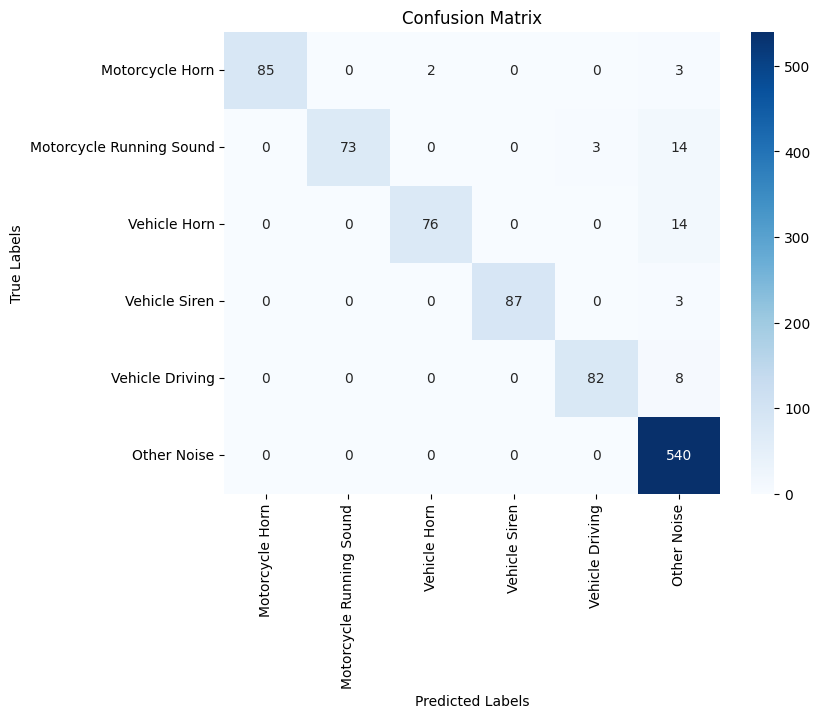

Overall Accuracy: 0.9525


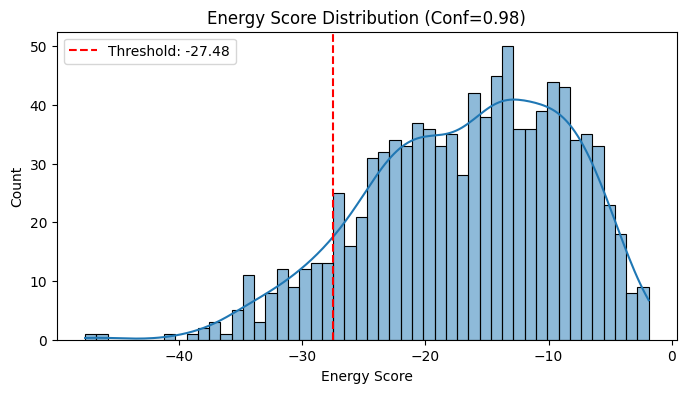


--- Sample Predictions ---
Sample 0: True = 기타소음, Predicted = 기타소음, Energy Score = -11.5521
Sample 1: True = 기타소음, Predicted = 기타소음, Energy Score = -23.0595
Sample 2: True = 기타소음, Predicted = 기타소음, Energy Score = -16.2884
Sample 3: True = 기타소음, Predicted = 기타소음, Energy Score = -31.7990
Sample 4: True = 기타소음, Predicted = 기타소음, Energy Score = -15.7097
Sample 5: True = 기타소음, Predicted = 기타소음, Energy Score = -9.9492
Sample 6: True = 기타소음, Predicted = 기타소음, Energy Score = -8.2780
Sample 7: True = 기타소음, Predicted = 기타소음, Energy Score = -22.3631
Sample 8: True = 기타소음, Predicted = 기타소음, Energy Score = -5.8696
Sample 9: True = 기타소음, Predicted = 기타소음, Energy Score = -8.5291


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
import logging
import itertools

# 로깅 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 전역 변수
MODEL = None
LOGITS_MODEL = None
TEMPERATURE = 1.0

# 라벨 정의
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn',
                  'Vehicle Siren', 'Vehicle Driving', 'Other Noise']
label_to_code = {label: i for i, label in enumerate(final_labels)}
index_to_label = {v: k for k, v in label_to_code.items()}
unknown_label_index = label_to_code['기타소음']

# 모델 초기화
def initialize_models(model_path="model/resnet_model_modified_v6.h5"):
    global MODEL, LOGITS_MODEL
    try:
        if MODEL is None:
            MODEL = load_model(model_path)
            last_layer = MODEL.layers[-1]
            if last_layer.get_config().get("activation") == "softmax":
                logits = Model(inputs=MODEL.input, outputs=MODEL.layers[-2].output)
                new_dense = Dense(last_layer.units, activation=None, name='logits')(logits.output)
                LOGITS_MODEL = Model(inputs=MODEL.input, outputs=new_dense)
                LOGITS_MODEL.layers[-1].set_weights(last_layer.get_weights())
            else:
                LOGITS_MODEL = MODEL
            logging.info(f"모델 {model_path} 로드 완료.")
    except Exception as e:
        logging.error(f"모델 로드 실패: {str(e)}")
        raise

# Energy Score 계산
def compute_energy(logits, T=TEMPERATURE):
    exp_vals = np.exp(logits / T)
    sum_exp = np.sum(exp_vals, axis=1) + 1e-9
    return -T * np.log(sum_exp)

# 데이터 검증 및 전처리
def validate_mfcc_data(mfcc_data):
    try:
        if not isinstance(mfcc_data, np.ndarray):
            mfcc_data = np.asarray(mfcc_data)
        if mfcc_data.ndim == 1:
            mfcc_data = mfcc_data.reshape(1, -1)
        if mfcc_data.shape[1] != 50:
            raise ValueError(f"MFCC 데이터 크기는 (n_samples, 50)이어야 함. 현재: {mfcc_data.shape}")
        if np.any(np.isnan(mfcc_data)) or np.any(np.isinf(mfcc_data)):
            raise ValueError("MFCC 데이터에 NaN 또는 Inf 값이 포함됨")
        return mfcc_data
    except Exception as e:
        logging.error(f"MFCC 데이터 검증 실패: {str(e)}")
        raise

# 예측 함수
def predict_samples(mfcc_data, conf_threshold, energy_threshold):
    try:
        if LOGITS_MODEL is None:
            initialize_models()

        mfcc_data = validate_mfcc_data(mfcc_data)
        X = mfcc_data.reshape(-1, 50, 1)

        logits = LOGITS_MODEL.predict(X, verbose=0)
        energy_scores = compute_energy(logits)
        softmax_probs = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)
        max_probs = np.max(softmax_probs, axis=1)
        basic_preds = np.argmax(softmax_probs, axis=1)

        final_preds = np.where((max_probs < conf_threshold) & 
                               (energy_scores > energy_threshold),
                               unknown_label_index, basic_preds)

        return final_preds, energy_scores
    except Exception as e:
        logging.error(f"예측 중 오류 발생: {str(e)}")
        raise

# 최적 임계값 찾기 (전체 데이터 + 가중치 조정)
def find_optimal_thresholds(X_ood, y_ood, X_ind, y_ind):
    initialize_models()
    conf_candidates = np.arange(0.9, 1.0, 0.02)  # 0.9, 0.92, 0.94, 0.96, 0.98
    logits_ood = LOGITS_MODEL.predict(X_ood.reshape(-1, 50, 1), verbose=0)
    energy_scores_ood = compute_energy(logits_ood)
    energy_candidates = np.linspace(min(energy_scores_ood), -15, 20)  # OOD 분포 하단부터 -15까지

    best_score = -1
    best_conf = None
    best_energy = None

    for conf, energy in itertools.product(conf_candidates, energy_candidates):
        ood_preds, _ = predict_samples(X_ood, conf, energy)
        ood_recall = recall_score(y_ood, ood_preds, labels=[unknown_label_index], average='weighted', zero_division=0)

        ind_preds, _ = predict_samples(X_ind, conf, energy)
        ind_accuracy = accuracy_score(y_ind, ind_preds)

        # OOD에 더 높은 가중치 (0.7:0.3)
        combined_score = 0.7 * ood_recall + 0.3 * ind_accuracy

        if combined_score > best_score:
            best_score = combined_score
            best_conf = conf
            best_energy = energy
            logging.info(f"New best: Conf={best_conf:.2f}, Energy={best_energy:.4f}, Score={best_score:.4f} "
                         f"(OOD Recall={ood_recall:.4f}, IND Accuracy={ind_accuracy:.4f})")

    return best_conf, best_energy

# 평가 및 시각화 함수
def evaluate_predictions(y_true, y_pred, energy_scores, conf_threshold, energy_threshold):
    print("\n--- Classification Report ---")
    report = classification_report(y_true, y_pred, target_names=english_labels, zero_division=0)
    print(report)

    cm = confusion_matrix(y_true, y_pred, labels=[label_to_code[l] for l in final_labels])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=english_labels, yticklabels=english_labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    accuracy = accuracy_score(y_true, y_pred)
    print(f"Overall Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(8, 4))
    sns.histplot(energy_scores, bins=50, kde=True)
    plt.axvline(x=energy_threshold, color='r', linestyle='--', label=f"Threshold: {energy_threshold:.2f}")
    plt.title(f"Energy Score Distribution (Conf={conf_threshold:.2f})")
    plt.xlabel("Energy Score")
    plt.legend()
    plt.show()

# 샘플 예측 출력
def print_sample_predictions(y_true, y_pred, energy_scores, num_samples=10):
    print("\n--- Sample Predictions ---")
    for i in range(min(num_samples, len(y_pred))):
        true_lbl = index_to_label[y_true[i]] if y_true is not None else "Unknown"
        pred_lbl = index_to_label[y_pred[i]]
        eng_score = energy_scores[i]
        print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Energy Score = {eng_score:.4f}")

# 메인 실행
if __name__ == "__main__":
    ood_file = "final_csv/untrained other noises.csv"
    ind_file = "final_csv/final_test_sampled_90_category_03.csv"

    df_ood = pd.read_csv(ood_file)
    mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
    X_ood = df_ood[mfcc_columns].values
    y_ood = df_ood['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index)).values

    df_ind = pd.read_csv(ind_file)
    X_ind = df_ind[mfcc_columns].values
    y_ind = df_ind['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index)).values

    print("Finding optimal thresholds...")
    best_conf, best_energy = find_optimal_thresholds(X_ood, y_ood, X_ind, y_ind)
    print(f"\nOptimal Thresholds: CONFIDENCE_THRESHOLD={best_conf:.2f}, ENERGY_THRESHOLD={best_energy:.4f}")

    for test_file, X_test, y_true in [(ood_file, X_ood, y_ood), (ind_file, X_ind, y_ind)]:
        print(f"\nTesting with {test_file}")
        y_pred, energy_scores = predict_samples(X_test, best_conf, best_energy)
        evaluate_predictions(y_true, y_pred, energy_scores, best_conf, best_energy)
        print_sample_predictions(y_true, y_pred, energy_scores)

In [5]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score

# 전역 변수
MODEL = None
LOGITS_MODEL = None
CONFIDENCE_THRESHOLD = 0.98
ENERGY_THRESHOLD = -30.0  # -27.4814 대신 조정
TEMPERATURE = 1.0

# 라벨 정의
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn',
                  'Vehicle Siren', 'Vehicle Driving', 'Other Noise']
label_to_code = {label: i for i, label in enumerate(final_labels)}
index_to_label = {v: k for k, v in label_to_code.items()}
unknown_label_index = label_to_code['기타소음']

# 모델 초기화
def initialize_models(model_path="model/resnet_model_modified_v6.h5"):
    global MODEL, LOGITS_MODEL
    MODEL = load_model(model_path)
    last_layer = MODEL.layers[-1]
    if last_layer.get_config().get("activation") == "softmax":
        logits = Model(inputs=MODEL.input, outputs=MODEL.layers[-2].output)
        new_dense = Dense(last_layer.units, activation=None)(logits.output)
        LOGITS_MODEL = Model(inputs=MODEL.input, outputs=new_dense)
        LOGITS_MODEL.layers[-1].set_weights(last_layer.get_weights())
    else:
        LOGITS_MODEL = MODEL

# Energy Score 계산
def compute_energy(logits, T=TEMPERATURE):
    exp_vals = np.exp(logits / T)
    sum_exp = np.sum(exp_vals, axis=1) + 1e-9
    return -T * np.log(sum_exp)

# 예측 함수
def predict_samples(mfcc_data):
    mfcc_data = np.asarray(mfcc_data).reshape(-1, 50, 1)
    logits = LOGITS_MODEL.predict(mfcc_data, verbose=0)
    energy_scores = compute_energy(logits)
    softmax_probs = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)
    max_probs = np.max(softmax_probs, axis=1)
    basic_preds = np.argmax(softmax_probs, axis=1)
    final_preds = np.where((max_probs < CONFIDENCE_THRESHOLD) & 
                           (energy_scores > ENERGY_THRESHOLD),
                           unknown_label_index, basic_preds)
    return final_preds, energy_scores

# 평가
def evaluate_predictions(y_true, y_pred):
    print("\n--- Classification Report ---")
    print(classification_report(y_true, y_pred, target_names=english_labels, zero_division=0))
    print(f"Overall Accuracy: {accuracy_score(y_true, y_pred):.4f}")

# 실행
if __name__ == "__main__":
    initialize_models()
    for test_file in ["final_csv/untrained other noises.csv", "final_csv/final_test_sampled_90_category_03.csv"]:
        print(f"\nTesting with {test_file}")
        df = pd.read_csv(test_file)
        mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
        X_test = df[mfcc_columns].values
        y_true = df['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index)).values
        y_pred, _ = predict_samples(X_test)
        evaluate_predictions(y_true, y_pred)


Testing with final_csv/untrained other noises.csv

--- Classification Report ---
                          precision    recall  f1-score   support

         Motorcycle Horn       0.00      0.00      0.00         0
Motorcycle Running Sound       0.00      0.00      0.00         0
            Vehicle Horn       0.00      0.00      0.00         0
           Vehicle Siren       0.00      0.00      0.00         0
         Vehicle Driving       0.00      0.00      0.00         0
             Other Noise       1.00      0.78      0.87      1374

                accuracy                           0.78      1374
               macro avg       0.17      0.13      0.15      1374
            weighted avg       1.00      0.78      0.87      1374

Overall Accuracy: 0.7766

Testing with final_csv/final_test_sampled_90_category_03.csv

--- Classification Report ---
                          precision    recall  f1-score   support

         Motorcycle Horn       1.00      0.94      0.97        90
Moto